Projekat 2

Importovanje biblioteka

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


Ucitavanje podataka

In [3]:
data = pd.read_csv('customer_segmentation.csv')
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [4]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
data = data.rename(
    columns={
                "MntWines": "Wines",
                "MntFruits":"Fruits",
                "MntMeatProducts":"Meat",
                "MntFishProducts":"Fish",
                "MntSweetProducts":"Sweets",
                "MntGoldProds":"Gold",
                "NumDealPurchases":"Deal Purchases",
                "NumWebPurchases":"Web Purchases",
                "NumCatalogPurchases":"Catalog Purchases",
                "NumStorePurchases":"Store Purchases",
                "NumWebVisitsMonth":"Web visits per Month"
            })

In [6]:
#Education i Marital_status su kategoricki atributi, pa cemo ih naknadno enkodirati

print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
#Provera nedostajucih vrednosti 
data.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
Wines                    0
Fruits                   0
Meat                     0
Fish                     0
Sweets                   0
Gold                     0
NumDealsPurchases        0
Web Purchases            0
Catalog Purchases        0
Store Purchases          0
Web visits per Month     0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [8]:
data['Income'].fillna(data['Income'].median(), inplace = True)
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
Web Purchases           0
Catalog Purchases       0
Store Purchases         0
Web visits per Month    0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Provera duplikata
data.duplicated(subset=None, keep='first')


0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [10]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
data.dtypes

ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
Wines                            int64
Fruits                           int64
Meat                             int64
Fish                             int64
Sweets                           int64
Gold                             int64
NumDealsPurchases                int64
Web Purchases                    int64
Catalog Purchases                int64
Store Purchases                  int64
Web visits per Month             int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

In [11]:
max(data['Dt_Customer'])


Timestamp('2014-06-29 00:00:00')

In [12]:
min(data['Dt_Customer'])

Timestamp('2012-07-30 00:00:00')

In [13]:
# Zapamti kolonu 'Dt_Customer'
dt_customer_column = data['Dt_Customer']

# Izbaci kolonu 'Dt_Customer' iz skupa kolona u data
data.drop(columns=['Dt_Customer'], inplace=True)

# Dodaj kolonu 'Dt_Customer' iza kolone 'ID'
data.insert(1, 'Dt_Customer', dt_customer_column)


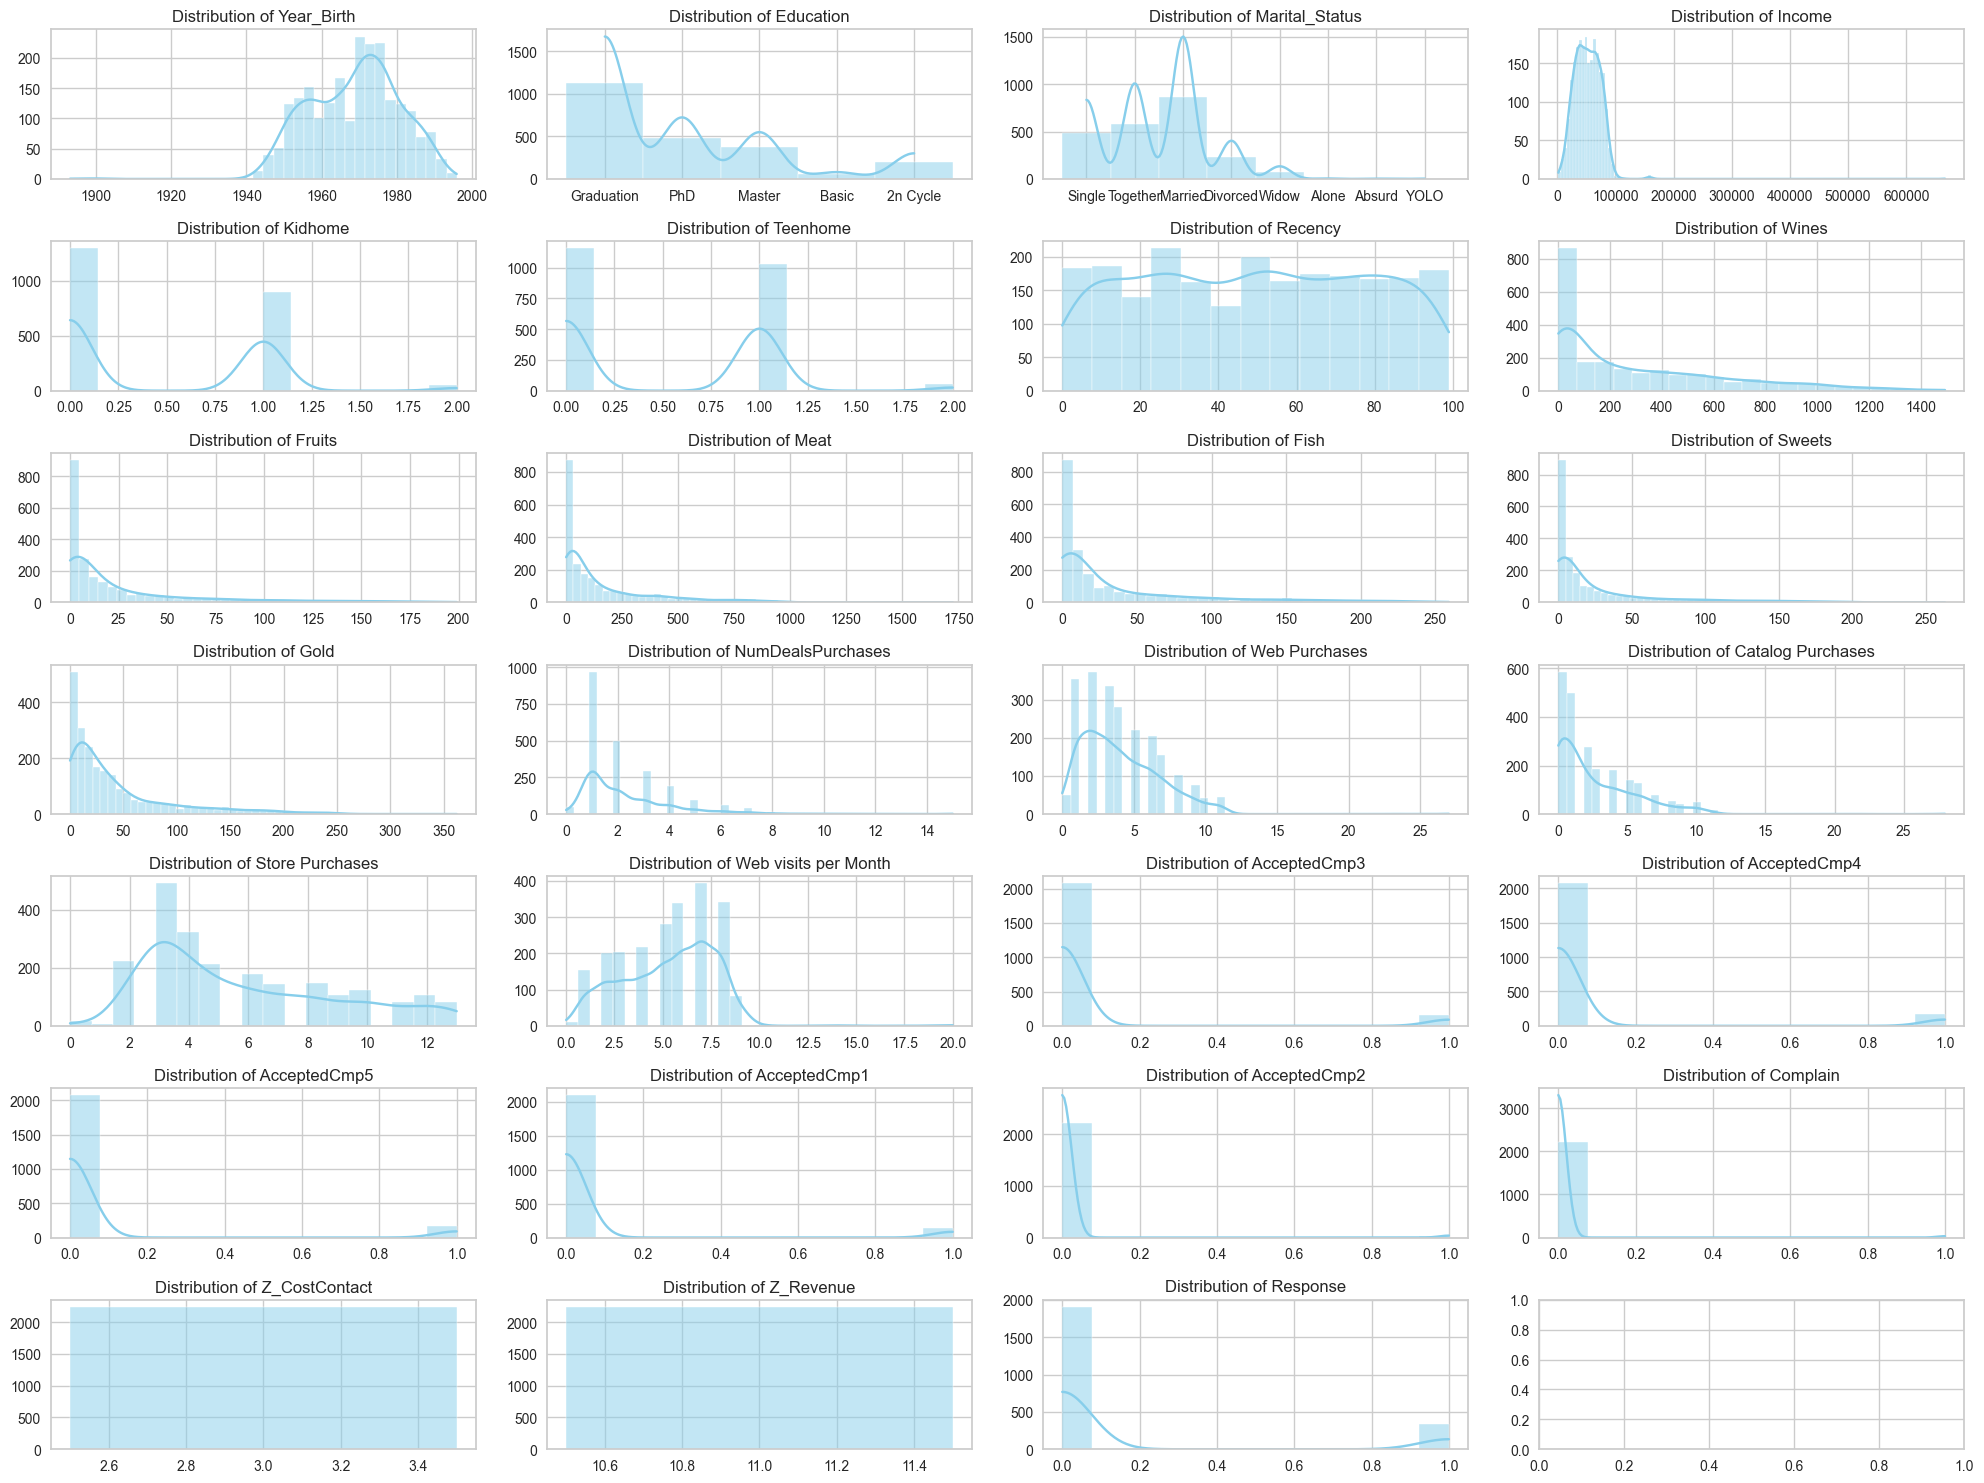

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje stila za grafike
sns.set_style("whitegrid")
#column_dt_customer = data['Dt_Customer']

# Broj kolona i redova u subplotu
num_cols = 4  # Broj kolona
num_rows = (len(data.columns) - 2) // num_cols + 1  # Broj redova

# Kreiranje subplota
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iteriranje kroz sve kolone osim 'Dt_Customer'
for i, column in enumerate(data.columns[2:]):
    #if column != 'Dt_Customer':
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data[column], kde=True, ax=axes[row, col], color='skyblue')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
        axes[row, col].set_xlabel('')
        axes[row, col].set_ylabel('')

# Uklanjanje praznih subplotova
for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Podešavanje rasporeda
plt.tight_layout()
plt.show()



Kako su vrednosti atributa 'Z_CostContact' i 'Z_Revenue' za svaki podatak iste, izbacicemo ove atribute, jer ne donose nikakvu informaciju.

In [15]:
data = data.drop(columns=['Z_CostContact', 'Z_Revenue'])

C:\Users\User\AppData\Local\Temp\ipykernel_28956\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_28956\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


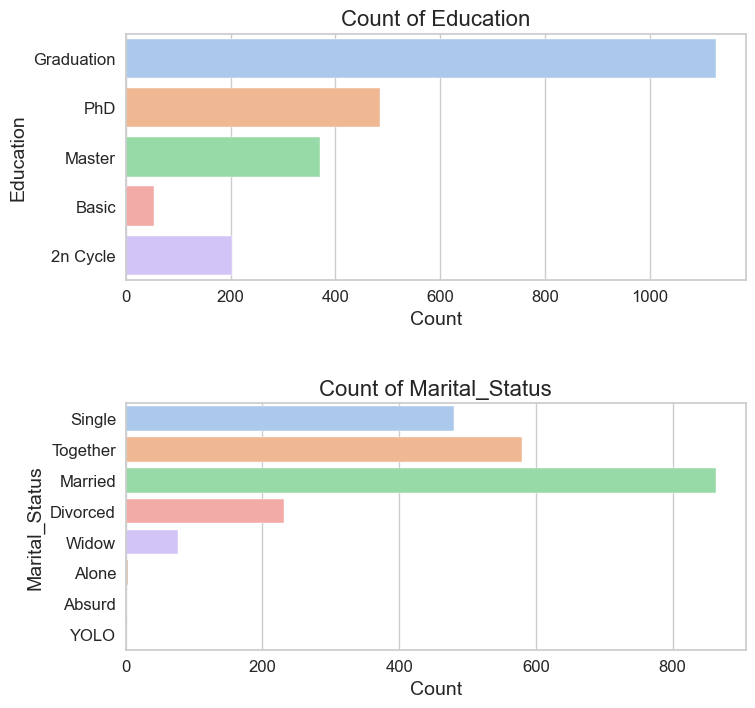

In [16]:
kategoricki_atributi = ['Education','Marital_Status']
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

In [17]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Master': 'Advanced',
    'PhD': 'Advanced',
    'Graduation': 'Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic':'Undergraduate'
}

# Zamena vrednosti u koloni 'Education' koristeći rečnik
data['Education'] = data['Education'].replace(mapping)

In [18]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Single': 'Single',
    'Together': 'Couple',
    'Married': 'Couple',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

# Dodavanje novih kolona 'Slobodan' i 'Zauzet' na osnovu mapiranja
data['Marital_Status'] = data['Marital_Status'].replace(mapping)


C:\Users\User\AppData\Local\Temp\ipykernel_28956\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_28956\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


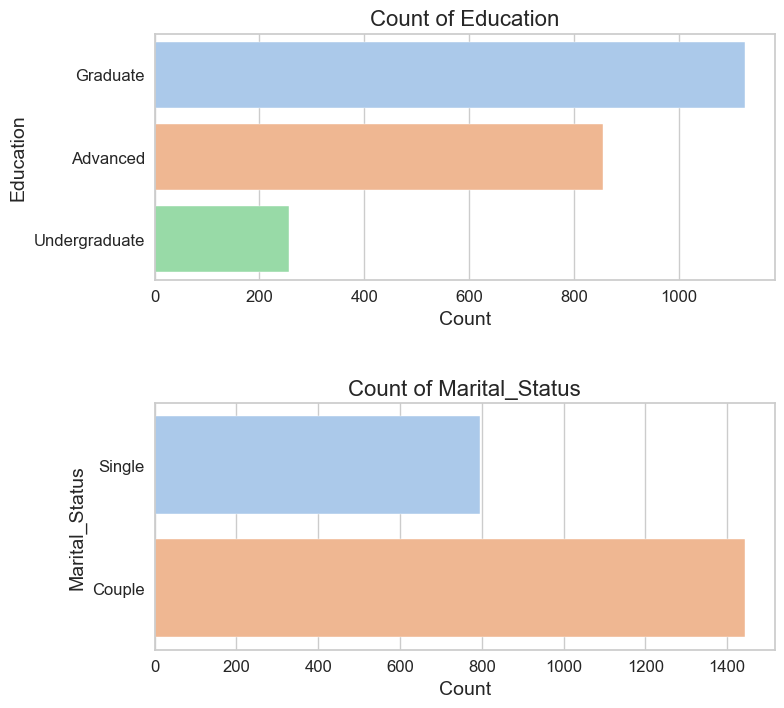

In [19]:
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

corr_data = data.drop(columns=kategoricki_atributi)
corr_data = corr_data.drop(columns=['ID', 'Dt_Customer'])

In [20]:
LE = LabelEncoder()
data['Marital_Status'] = data[['Marital_Status']].apply(LE.fit_transform)

In [21]:
encoded_data = pd.get_dummies(data, columns=['Education'])
encoded_data

ID Dt_Customer  Year_Birth  Marital_Status   Income  Kidhome  \
0      5524  2012-09-04        1957               1  58138.0        0   
1      2174  2014-03-08        1954               1  46344.0        1   
2      4141  2013-08-21        1965               0  71613.0        0   
3      6182  2014-02-10        1984               0  26646.0        1   
4      5324  2014-01-19        1981               0  58293.0        1   
...     ...         ...         ...             ...      ...      ...   
2235  10870  2013-06-13        1967               0  61223.0        0   
2236   4001  2014-06-10        1946               0  64014.0        2   
2237   7270  2014-01-25        1981               1  56981.0        0   
2238   8235  2014-01-24        1956               0  69245.0        0   
2239   9405  2012-10-15        1954               0  52869.0        1   

      Teenhome  Recency  Wines  Fruits  ...  AcceptedCmp3  AcceptedCmp4  \
0            0       58    635      88  ...             0             0   
1            1       38     11       1  ...             0             0   
2            0       26    426      49  ...             0             0   
3            0       26     11       4  ...             0             0   
4            0       94    173      43  ...             0             0   
...        ...      ...    ...     ...  ...           ...           ...   
2235         1       46    709      43  ...             0             0   
2236         1       56    406       0  ...             0             0   
2237         0       91    908      48  ...             0             1   
2238         1        8    428      30  ...             0             0   
2239         1       40     84       3  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                0             0             0         0         1   
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2235             0             0             0         0         0   
2236             0             1             0         0         0   
2237             0             0             0         0         0   
2238             0             0             0         0         0   
2239             0             0             0         0         1   

      Education_Advanced  Education_Graduate  Education_Undergraduate  
0                  False                True                    False  
1                  False                True                    False  
2                  False                True                    False  
3                  False                True                    False  
4                   True               False                    False  
...                  ...                 ...                      ...  
2235               False                True                    False  
2236                True               False                    False  
2237               False                True                    False  
2238                True               False                    False  
2239                True               False                    False  

[2240 rows x 29 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'Year_Birth'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Kidhome'),
  Text(3.5, 0, 'Teenhome'),
  Text(4.5, 0, 'Recency'),
  Text(5.5, 0, 'Wines'),
  Text(6.5, 0, 'Fruits'),
  Text(7.5, 0, 'Meat'),
  Text(8.5, 0, 'Fish'),
  Text(9.5, 0, 'Sweets'),
  Text(10.5, 0, 'Gold'),
  Text(11.5, 0, 'NumDealsPurchases'),
  Text(12.5, 0, 'Web Purchases'),
  Text(13.5, 0, 'Catalog Purchases'),
  Text(14.5, 0, 'Store Purchases'),
  Text(15.5, 0, 'Web visits per Month'),
  Text(16.5, 0, 'AcceptedCmp3'),
  Text(17.5, 0, 'AcceptedCmp4'),
  Text(18.5, 0, 'AcceptedCmp5'),
  Text(19.5, 0, 'AcceptedCmp1'),
  Text(20.5, 0, 'AcceptedCmp2'),
  Text(21.5, 0, 'Complain'),
  Text(22.5, 0, 'Response')])

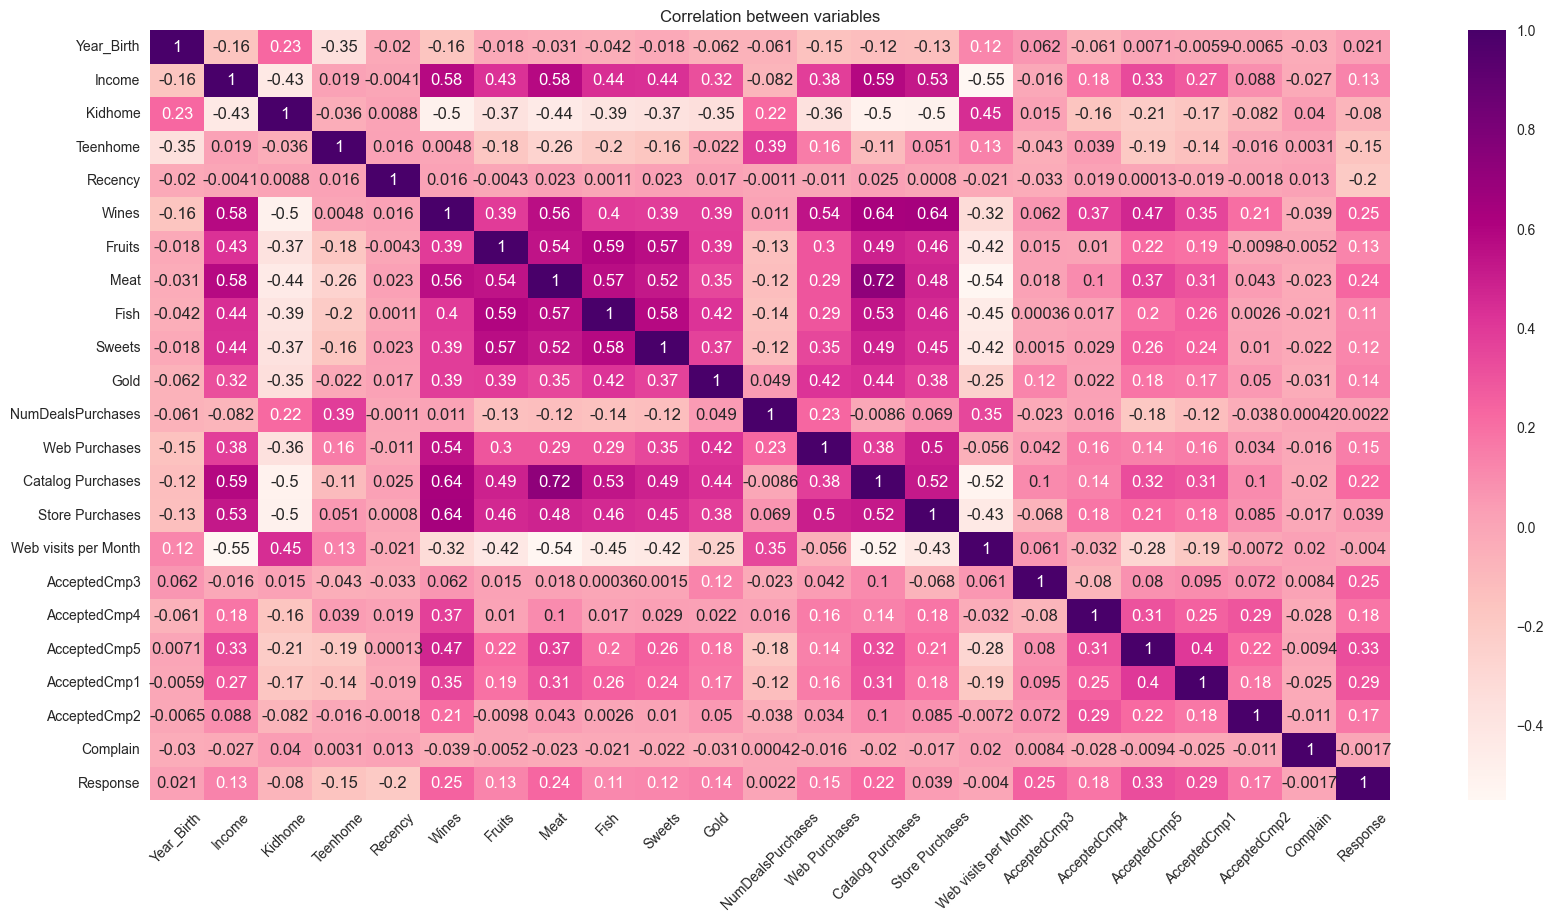

In [22]:
plt.subplots(figsize=(20,10))
correlation=corr_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=45)

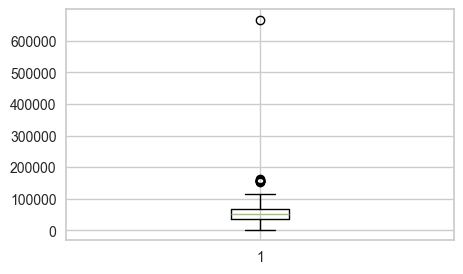

In [23]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(encoded_data["Income"])
plt.show()

In [24]:
original_count = encoded_data.shape[0]
encoded_data = encoded_data[encoded_data['Income'] <= 600000]
filtered_count = encoded_data.shape[0]
rows_deleted = original_count - filtered_count  # Broj izbrisanih redova

print(f'Broj izbrisanih redova: {rows_deleted}')

Broj izbrisanih redova: 1


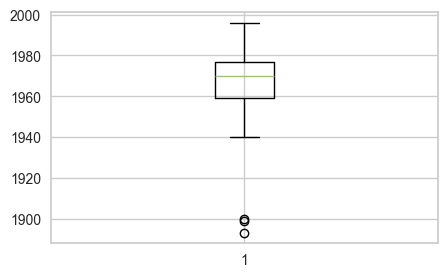

In [25]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(encoded_data["Year_Birth"])
plt.show()

In [26]:
original_count = encoded_data.shape[0]
encoded_data = encoded_data[encoded_data['Year_Birth'] >= 1920]
filtered_count = encoded_data.shape[0]
rows_deleted = original_count - filtered_count  # Broj izbrisanih redova

print(f'Broj izbrisanih redova: {rows_deleted}')

Broj izbrisanih redova: 3


In [27]:
# Spojite kolone "Kidhome" i "Teenhome" u novu kolonu "Children"
encoded_data['Children'] = encoded_data['Kidhome'] + encoded_data['Teenhome']

# Izbrišite originalne kolone "Kidhome" i "Teenhome" ako više nisu potrebne
encoded_data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Prikazivanje rezultata
print(encoded_data.head())

     ID Dt_Customer  Year_Birth  Marital_Status   Income  Recency  Wines  \
0  5524  2012-09-04        1957               1  58138.0       58    635   
1  2174  2014-03-08        1954               1  46344.0       38     11   
2  4141  2013-08-21        1965               0  71613.0       26    426   
3  6182  2014-02-10        1984               0  26646.0       26     11   
4  5324  2014-01-19        1981               0  58293.0       94    173   

   Fruits  Meat  Fish  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0      88   546   172  ...             0             0             0   
1       1     6     2  ...             0             0             0   
2      49   127   111  ...             0             0             0   
3       4    20    10  ...             0             0             0   
4      43   118    46  ...             0             0             0   

   AcceptedCmp2  Complain  Response  Education_Advanced  Education_Graduate  \
0             0         0      

In [28]:
#Broj godina u 2014 godini jer su podaci za 2014 godinu
encoded_data['Age'] = 2014 - encoded_data['Year_Birth']
encoded_data.drop(['Year_Birth'], axis=1, inplace=True)


# Prikazivanje rezultata
print(encoded_data.head())

     ID Dt_Customer  Marital_Status   Income  Recency  Wines  Fruits  Meat  \
0  5524  2012-09-04               1  58138.0       58    635      88   546   
1  2174  2014-03-08               1  46344.0       38     11       1     6   
2  4141  2013-08-21               0  71613.0       26    426      49   127   
3  6182  2014-02-10               0  26646.0       26     11       4    20   
4  5324  2014-01-19               0  58293.0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   172      88  ...             0             0             0         0   
1     2       1  ...             0             0             0         0   
2   111      21  ...             0             0             0         0   
3    10       3  ...             0             0             0         0   
4    46      27  ...             0             0             0         0   

   Response  Education_Advanced  Education_Graduate  Education_Undergradua

In [29]:
# Pronalaženje minimalne vrednosti u koloni 'Dt_Customer'
min_date = encoded_data['Dt_Customer'].min()

# Računanje broja dana u odnosu na minimalnu vrednost
encoded_data['Days_Since_First_Purchase'] = (encoded_data['Dt_Customer'] - min_date).dt.days

# Prikazivanje rezultata
print(data.head())

     ID Dt_Customer  Year_Birth Education  Marital_Status   Income  Kidhome  \
0  5524  2012-09-04        1957  Graduate               1  58138.0        0   
1  2174  2014-03-08        1954  Graduate               1  46344.0        1   
2  4141  2013-08-21        1965  Graduate               0  71613.0        0   
3  6182  2014-02-10        1984  Graduate               0  26646.0        1   
4  5324  2014-01-19        1981  Advanced               0  58293.0        1   

   Teenhome  Recency  Wines  ...  Catalog Purchases  Store Purchases  \
0         0       58    635  ...                 10                4   
1         1       38     11  ...                  1                2   
2         0       26    426  ...                  2               10   
3         0       26     11  ...                  0                4   
4         0       94    173  ...                  3                6   

   Web visits per Month  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7

In [30]:
encoded_data.dtypes

ID                                    int64
Dt_Customer                  datetime64[ns]
Marital_Status                        int32
Income                              float64
Recency                               int64
Wines                                 int64
Fruits                                int64
Meat                                  int64
Fish                                  int64
Sweets                                int64
Gold                                  int64
NumDealsPurchases                     int64
Web Purchases                         int64
Catalog Purchases                     int64
Store Purchases                       int64
Web visits per Month                  int64
AcceptedCmp3                          int64
AcceptedCmp4                          int64
AcceptedCmp5                          int64
AcceptedCmp1                          int64
AcceptedCmp2                          int64
Complain                              int64
Response                        

In [31]:
encoded_data = encoded_data.drop(columns = ['Dt_Customer', 'ID'], axis = 1)

In [32]:
encoded_data["TotalAcceptedCmp"] = encoded_data['AcceptedCmp3'] + encoded_data['AcceptedCmp4'] + encoded_data['AcceptedCmp5'] + encoded_data['AcceptedCmp1'] + encoded_data['AcceptedCmp2'] + encoded_data['Response']
del_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']
encoded_data = encoded_data.drop(del_col, axis=1)

In [33]:
encoded_data.dtypes

Marital_Status                 int32
Income                       float64
Recency                        int64
Wines                          int64
Fruits                         int64
Meat                           int64
Fish                           int64
Sweets                         int64
Gold                           int64
NumDealsPurchases              int64
Web Purchases                  int64
Catalog Purchases              int64
Store Purchases                int64
Web visits per Month           int64
Complain                       int64
Education_Advanced              bool
Education_Graduate              bool
Education_Undergraduate         bool
Children                       int64
Age                            int64
Days_Since_First_Purchase      int64
TotalAcceptedCmp               int64
dtype: object

In [34]:
duplicates = encoded_data.duplicated()
duplicates.sum()

185

In [35]:
encoded_data.drop_duplicates(inplace=True)
encoded_data.duplicated().sum()

0

In [36]:
encoded_data.head(n=10)

Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0               1  58138.0       58    635      88   546   172      88    88   
1               1  46344.0       38     11       1     6     2       1     6   
2               0  71613.0       26    426      49   127   111      21    42   
3               0  26646.0       26     11       4    20    10       3     5   
4               0  58293.0       94    173      43   118    46      27    15   
5               0  62513.0       16    520      42    98     0      42    14   
6               1  55635.0       34    235      65   164    50      49    27   
7               0  33454.0       32     76      10    56     3       1    23   
8               0  30351.0       19     14       0    24     3       3     2   
9               0   5648.0       68     28       0     6     1       1    13   

   NumDealsPurchases  ...  Store Purchases  Web visits per Month  Complain  \
0                  3  ...                4                     7         0   
1                  2  ...                2                     5         0   
2                  1  ...               10                     4         0   
3                  2  ...                4                     6         0   
4                  5  ...                6                     5         0   
5                  2  ...               10                     6         0   
6                  4  ...                7                     6         0   
7                  2  ...                4                     8         0   
8                  1  ...                2                     9         0   
9                  1  ...                0                    20         0   

   Education_Advanced  Education_Graduate  Education_Undergraduate  Children  \
0               False                True                    False         0   
1               False                True                    False         2   
2               False                True                    False         0   
3               False                True                    False         1   
4                True               False                    False         1   
5                True               False                    False         1   
6               False                True                    False         1   
7                True               False                    False         1   
8                True               False                    False         1   
9                True               False                    False         2   

   Age  Days_Since_First_Purchase  TotalAcceptedCmp  
0   57                         36                 1  
1   60                        586                 0  
2   49                        387                 0  
3   30                        560                 0  
4   33                        538                 0  
5   47                        406                 0  
6   43                        106                 0  
7   29                        282                 0  
8   40                        311                 1  
9   64                        591                 1  

[10 rows x 22 columns]

In [37]:
### true,false za education u 1,0

catcol = ["Education_Advanced","Education_Graduate","Education_Undergraduate"]
le = LabelEncoder()
for col in catcol:
        encoded_data[col] = le.fit_transform(encoded_data[col])

In [38]:
encoded_data.head(n=10)

Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0               1  58138.0       58    635      88   546   172      88    88   
1               1  46344.0       38     11       1     6     2       1     6   
2               0  71613.0       26    426      49   127   111      21    42   
3               0  26646.0       26     11       4    20    10       3     5   
4               0  58293.0       94    173      43   118    46      27    15   
5               0  62513.0       16    520      42    98     0      42    14   
6               1  55635.0       34    235      65   164    50      49    27   
7               0  33454.0       32     76      10    56     3       1    23   
8               0  30351.0       19     14       0    24     3       3     2   
9               0   5648.0       68     28       0     6     1       1    13   

   NumDealsPurchases  ...  Store Purchases  Web visits per Month  Complain  \
0                  3  ...                4                     7         0   
1                  2  ...                2                     5         0   
2                  1  ...               10                     4         0   
3                  2  ...                4                     6         0   
4                  5  ...                6                     5         0   
5                  2  ...               10                     6         0   
6                  4  ...                7                     6         0   
7                  2  ...                4                     8         0   
8                  1  ...                2                     9         0   
9                  1  ...                0                    20         0   

   Education_Advanced  Education_Graduate  Education_Undergraduate  Children  \
0                   0                   1                        0         0   
1                   0                   1                        0         2   
2                   0                   1                        0         0   
3                   0                   1                        0         1   
4                   1                   0                        0         1   
5                   1                   0                        0         1   
6                   0                   1                        0         1   
7                   1                   0                        0         1   
8                   1                   0                        0         1   
9                   1                   0                        0         2   

   Age  Days_Since_First_Purchase  TotalAcceptedCmp  
0   57                         36                 1  
1   60                        586                 0  
2   49                        387                 0  
3   30                        560                 0  
4   33                        538                 0  
5   47                        406                 0  
6   43                        106                 0  
7   29                        282                 0  
8   40                        311                 1  
9   64                        591                 1  

[10 rows x 22 columns]

In [39]:
encoded_data.dtypes

Marital_Status                 int32
Income                       float64
Recency                        int64
Wines                          int64
Fruits                         int64
Meat                           int64
Fish                           int64
Sweets                         int64
Gold                           int64
NumDealsPurchases              int64
Web Purchases                  int64
Catalog Purchases              int64
Store Purchases                int64
Web visits per Month           int64
Complain                       int64
Education_Advanced             int64
Education_Graduate             int64
Education_Undergraduate        int64
Children                       int64
Age                            int64
Days_Since_First_Purchase      int64
TotalAcceptedCmp               int64
dtype: object

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'Marital_Status'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Recency'),
  Text(3.5, 0, 'Wines'),
  Text(4.5, 0, 'Fruits'),
  Text(5.5, 0, 'Meat'),
  Text(6.5, 0, 'Fish'),
  Text(7.5, 0, 'Sweets'),
  Text(8.5, 0, 'Gold'),
  Text(9.5, 0, 'NumDealsPurchases'),
  Text(10.5, 0, 'Web Purchases'),
  Text(11.5, 0, 'Catalog Purchases'),
  Text(12.5, 0, 'Store Purchases'),
  Text(13.5, 0, 'Web visits per Month'),
  Text(14.5, 0, 'Complain'),
  Text(15.5, 0, 'Education_Advanced'),
  Text(16.5, 0, 'Education_Graduate'),
  Text(17.5, 0, 'Education_Undergraduate'),
  Text(18.5, 0, 'Children'),
  Text(19.5, 0, 'Age'),
  Text(20.5, 0, 'Days_Since_First_Purchase'),
  Text(21.5, 0, 'TotalAcceptedCmp')])

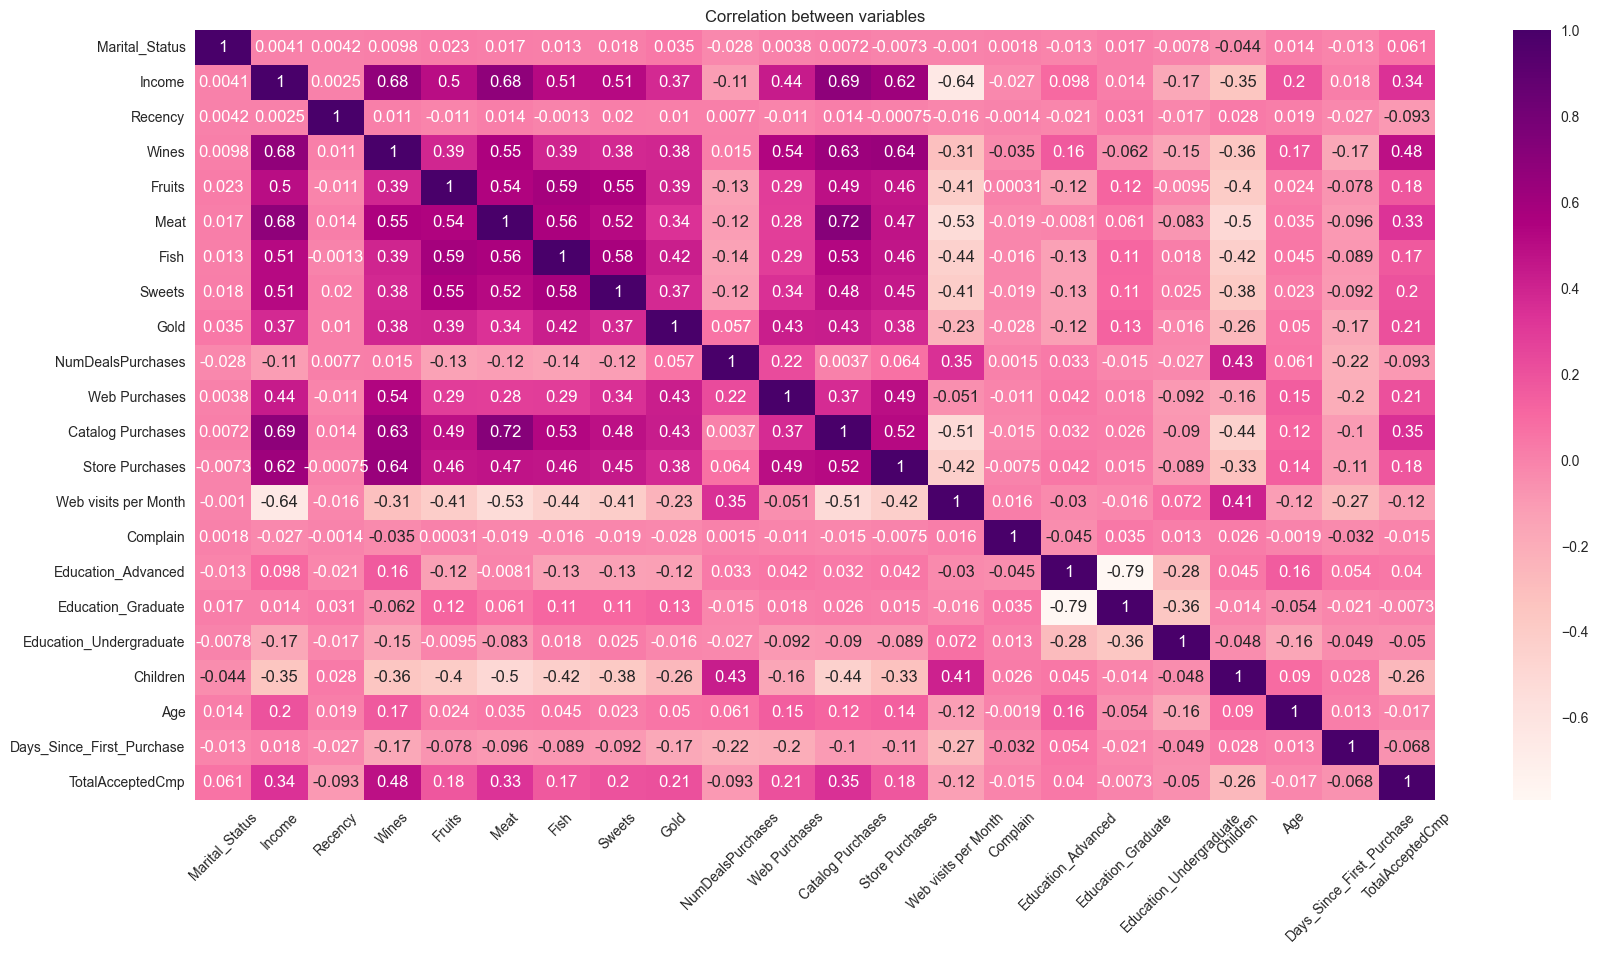

In [40]:
plt.subplots(figsize=(20,10))
correlation=encoded_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=45)

## Primena algoritma 

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=80)
pca.fit(encoded_data)
df_pca = pd.DataFrame(pca.transform(encoded_data), columns=(["f1","f2", "f3"]))
df_pca.describe().T

count          mean           std           min           25%  \
f1  2051.0 -3.405616e-12  21475.745071 -50324.565195 -16362.168710   
f2  2051.0 -4.140618e-14    263.343410   -922.773095   -137.321061   
f3  2051.0 -9.090513e-15    187.833562   -567.601170   -144.956999   

           50%           75%            max  
f1 -672.716224  16155.358509  110329.787632  
f2   26.226719    172.053481    1504.292636  
f3   -6.944866    138.211171    1056.270515

In [42]:
x =df_pca["f1"]
y =df_pca["f2"]
z =df_pca["f3"]

In [43]:

df_pca_agg = df_pca.copy()
df_pca_gaussianmixture = df_pca.copy()
df_spec_clus=df_pca.copy()

### Izbor optimalnog broja klastera

Elbow Method to determine the number of clusters to be formed:


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

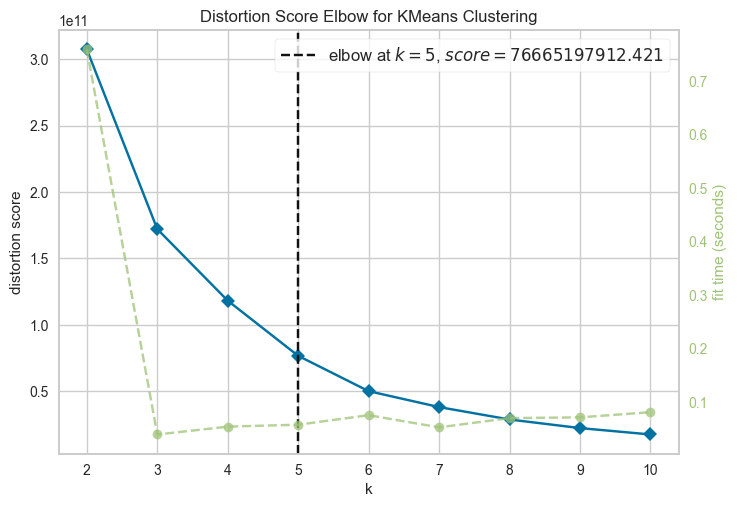

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

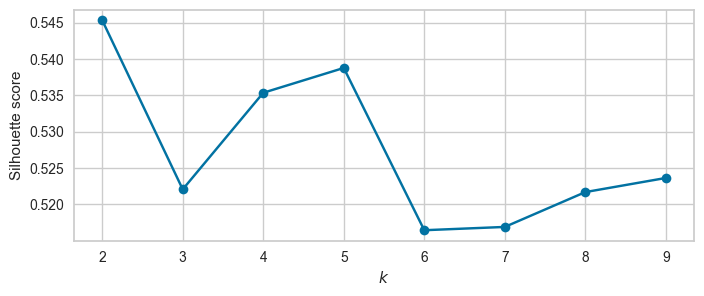

In [45]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_pca)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [46]:
cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.5453195020273761
Silhouette Score for 3 Clusters: 0.5220798802906852
Silhouette Score for 4 Clusters: 0.535351837650912
Silhouette Score for 5 Clusters: 0.5387614378837043
Silhouette Score for 6 Clusters: 0.5164655410334605
Silhouette Score for 7 Clusters: 0.5169181921158299
Silhouette Score for 8 Clusters: 0.5217057259001225
Silhouette Score for 9 Clusters: 0.5236461092178354


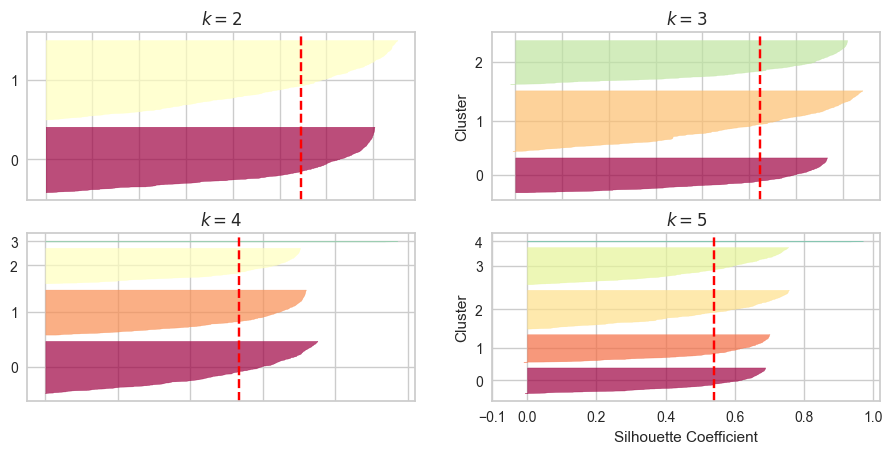

In [47]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)

    padding = len(df_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

### K-Means algoritam

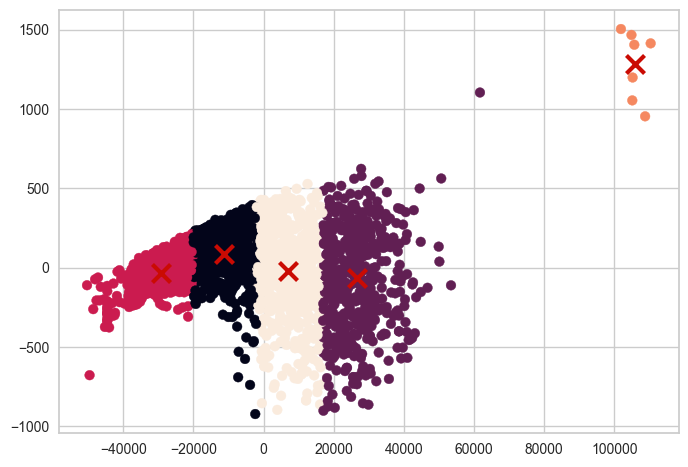

In [48]:
X = df_pca.values

# Inicijalizacija modela
kmeans = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(X)

y_kmeans = kmeans.predict(X)

# Izračunavanje središta klastera
centroids = kmeans.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.show()

df_pca["cluster"] = y_kmeans

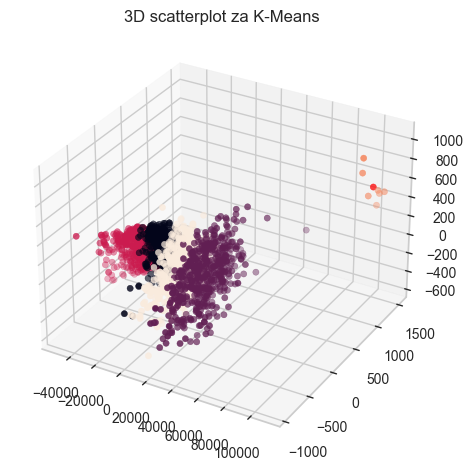

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=df_pca['cluster'])

# Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='o')

ax.set_title("3D scatterplot za K-Means")

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28956\2644135069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_pca["cluster"], palette= pal)


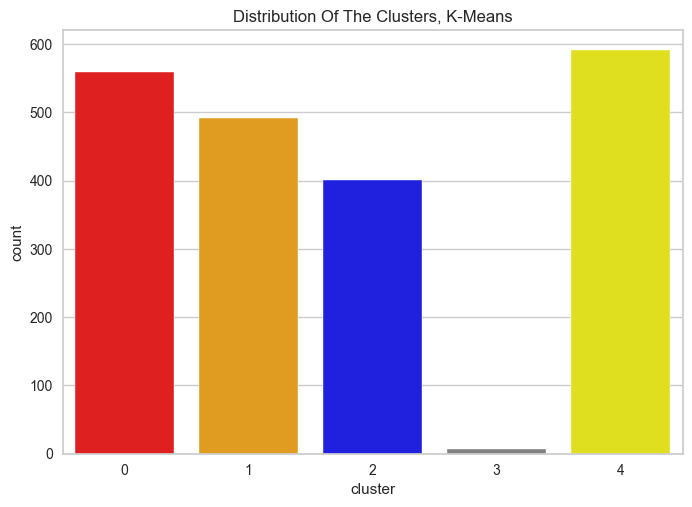

In [50]:
#Plotting countplot of clusters
pal = ["#FF0000", "#FFA500", "#0000FF", "#808080", "#FFFF00"]
pl = sns.countplot(x=df_pca["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters, K-Means")
plt.show()

In [51]:
izlaz = pd.DataFrame(columns=["Algoritam", "Broj klastera", "Score type", "Score"])
izlaz

Empty DataFrame
Columns: [Algoritam, Broj klastera, Score type, Score]
Index: []

#### Silhouette score

In [52]:
score_silhouette = silhouette_score(X, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["K-Means", Elbow_M.elbow_value_, "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5349744905842321


#### Calianski Harabasz score-a

In [53]:
score_calianski_harabasz = calinski_harabasz_score(X, labels)
print("Calianski Harabasz score:", score_calianski_harabasz)

izlaz.loc[-1] = ["K-Means", Elbow_M.elbow_value_, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()

Calianski Harabasz score: 5798.01870759945


#### Davies-Bouldin score

In [54]:
score_davies_bouldin = davies_bouldin_score(X, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["K-Means", Elbow_M.elbow_value_, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.45553197450770233


In [55]:
izlaz

Algoritam  Broj klastera            Score type        Score
0   K-Means              5  Davies-Bouldin score     0.455532
1   K-Means              5    Calianski_Harabasz  5798.018708
2   K-Means              5            Silhouette     0.534974

### Agglomerative algoritam

Elbow Method to determine the number of clusters to be formed:


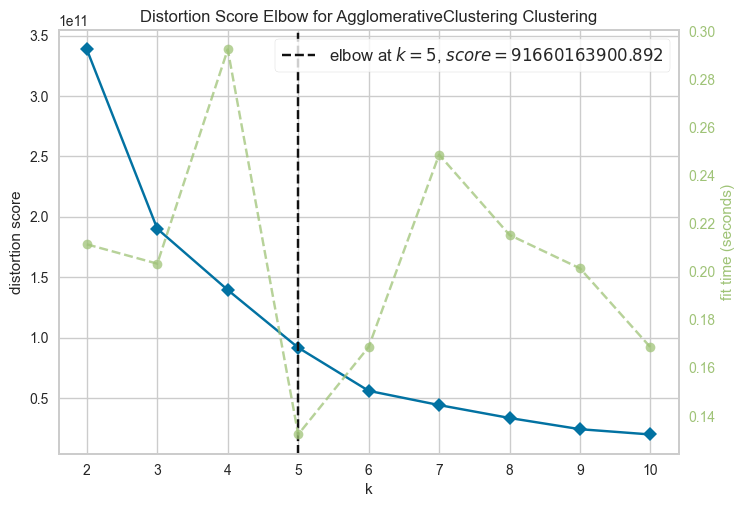

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(df_pca_agg)
Elbow_M.show()

In [57]:
X_agg = df_pca_agg.values
AC = AgglomerativeClustering(n_clusters=Elbow_M.elbow_value_, affinity='euclidean', linkage='ward')
yhat_AC = AC.fit_predict(X_agg)
df_pca_agg["cluster"]= yhat_AC
labels = AC.labels_
centroids = np.zeros((AC.n_clusters, df_pca_agg.shape[1]))
for i in range(AC.n_clusters):
    centroids[i, :] = np.mean(df_pca_agg[df_pca_agg["cluster"] == i], axis = 0)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


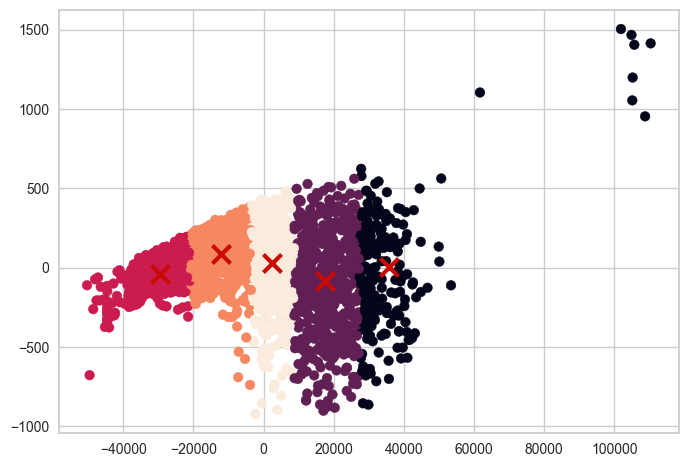

In [58]:
plt.scatter(X_agg[:, 0], X_agg[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.show()

In [59]:
x =df_pca_agg["f1"]
y =df_pca_agg["f2"]
z =df_pca_agg["f3"]


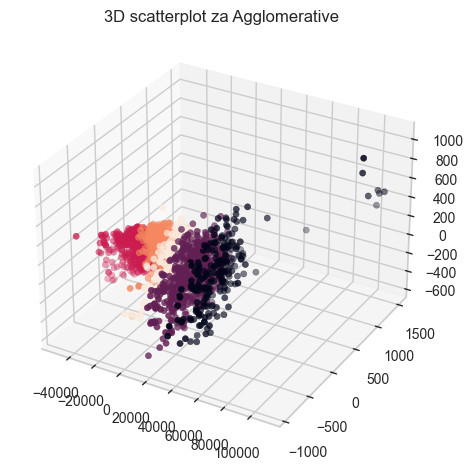

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=df_pca_agg['cluster'])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='o')

ax.set_title("3D scatterplot za Agglomerative")

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28956\1905342000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_pca_agg["cluster"], palette= pal)


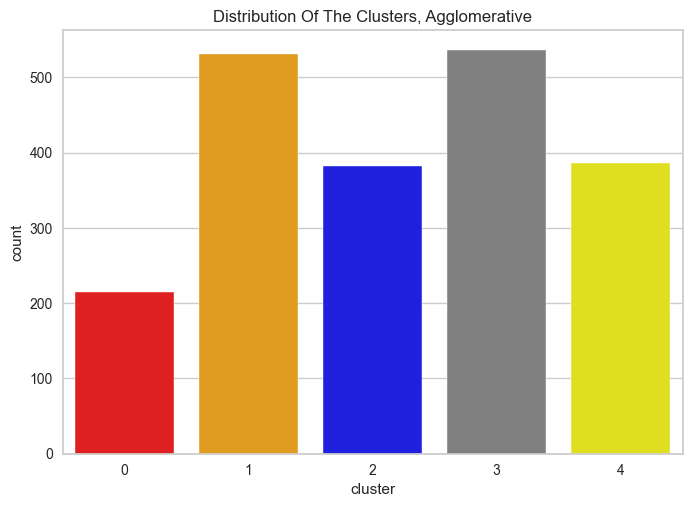

In [61]:
pal = ["#FF0000", "#FFA500", "#0000FF", "#808080", "#FFFF00"]
pl = sns.countplot(x=df_pca_agg["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters, Agglomerative")
plt.show()

#### Silhouette score

In [62]:
score_silhouette = silhouette_score(X_agg, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Agglomerative", Elbow_M.elbow_value_, "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5010073493608044


#### Calianski Harabasz score

In [63]:
score_calianski_harabasz = calinski_harabasz_score(X_agg, labels)
print("Calianski Harabasz score:", score_calianski_harabasz)

izlaz.loc[-1] = ["Agglomerative", Elbow_M.elbow_value_, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()

Calianski Harabasz score: 4765.8252835688145


#### Davies-Bouldin score

In [64]:
score_davies_bouldin = davies_bouldin_score(X_agg, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Agglomerative", Elbow_M.elbow_value_, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.5835335455518085


In [65]:
izlaz

Algoritam  Broj klastera            Score type        Score
0  Agglomerative              5  Davies-Bouldin score     0.583534
1  Agglomerative              5    Calianski_Harabasz  4765.825284
2  Agglomerative              5            Silhouette     0.501007
3        K-Means              5  Davies-Bouldin score     0.455532
4        K-Means              5    Calianski_Harabasz  5798.018708
5        K-Means              5            Silhouette     0.534974

### Spectral Clustering

Elbow Method to determine the number of clusters to be formed:


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages

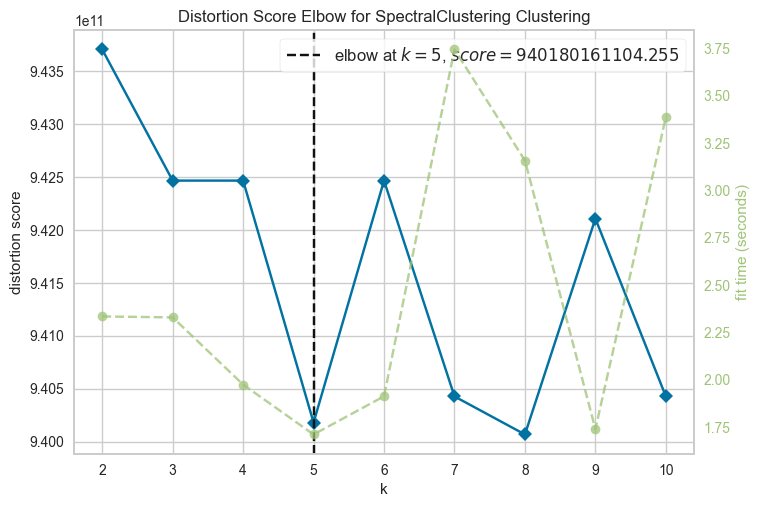

<Axes: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from sklearn.cluster import SpectralClustering

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(SpectralClustering(), k=10)
Elbow_M.fit(df_spec_clus)
Elbow_M.show()

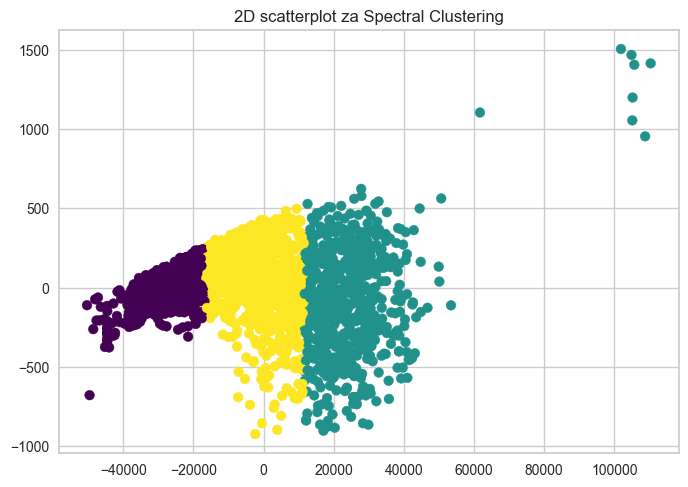

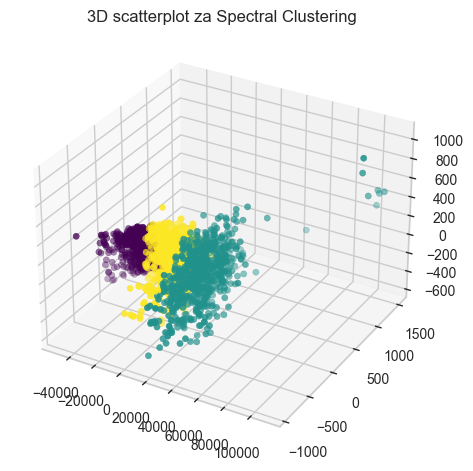

C:\Users\User\AppData\Local\Temp\ipykernel_28956\1459506721.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='cluster', data=df_spec_clus, palette=pal)


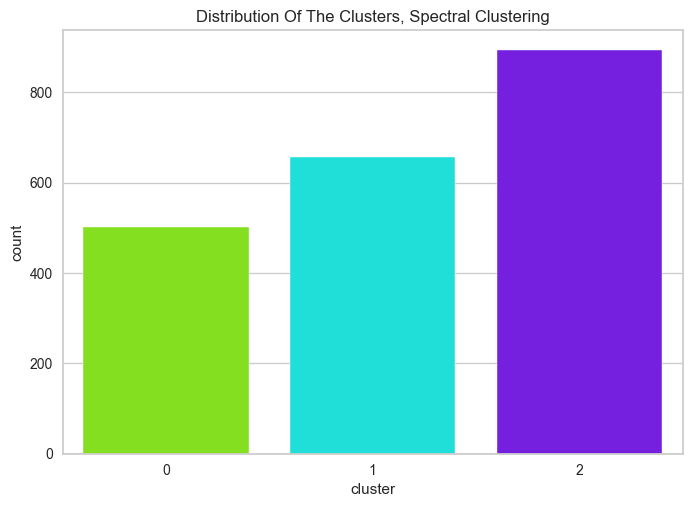

In [67]:
from sklearn.cluster import SpectralClustering

X_spectral = df_spec_clus.values

n_clusters = 3 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(X_spectral)

df_spec_clus['cluster'] = labels

plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c=labels, cmap='viridis')
plt.title("2D scatterplot za Spectral Clustering")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_spec_clus['f1'], df_spec_clus['f2'], df_spec_clus['f3'], c=labels, cmap='viridis')
ax.set_title("3D scatterplot za Spectral Clustering")
plt.show()

pal = sns.color_palette("hsv", n_clusters)  
pl = sns.countplot(x='cluster', data=df_spec_clus, palette=pal)
pl.set_title("Distribution Of The Clusters, Spectral Clustering")
plt.show()

#### Silhouette score

In [68]:
score_silhouette = silhouette_score(X_spectral, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Spectral Clustering", 3 , "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.531353491971105


##### Calianski_Harabasz score

In [69]:
score_calianski_harabasz = calinski_harabasz_score(X_spectral, labels)
print("Calianski_Harabasz score", score_calianski_harabasz)

izlaz.loc[-1] = ["Spectral Clustering", 3, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()


Calianski_Harabasz score 4358.238586930166


#### Davies-Bouldin score

In [70]:
score_davies_bouldin = davies_bouldin_score(X_spectral, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Spectral Clustering", 3, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.5440355565765796


In [71]:
izlaz

Algoritam  Broj klastera            Score type        Score
0  Spectral Clustering              3  Davies-Bouldin score     0.544036
1  Spectral Clustering              3    Calianski_Harabasz  4358.238587
2  Spectral Clustering              3            Silhouette     0.531353
3        Agglomerative              5  Davies-Bouldin score     0.583534
4        Agglomerative              5    Calianski_Harabasz  4765.825284
5        Agglomerative              5            Silhouette     0.501007
6              K-Means              5  Davies-Bouldin score     0.455532
7              K-Means              5    Calianski_Harabasz  5798.018708
8              K-Means              5            Silhouette     0.534974

### Gaussian Mixture

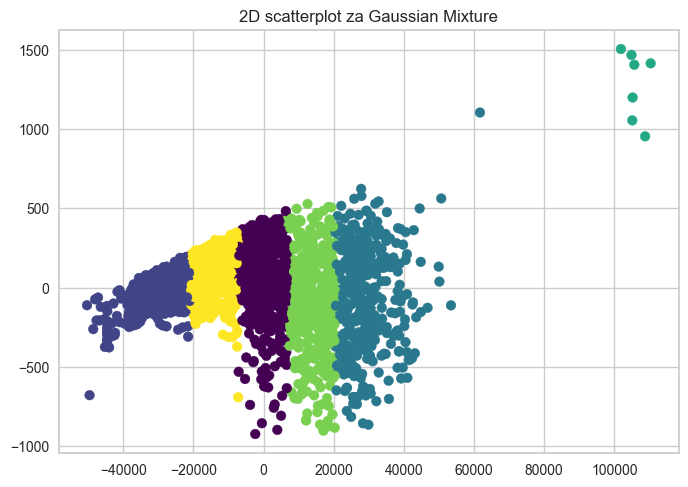

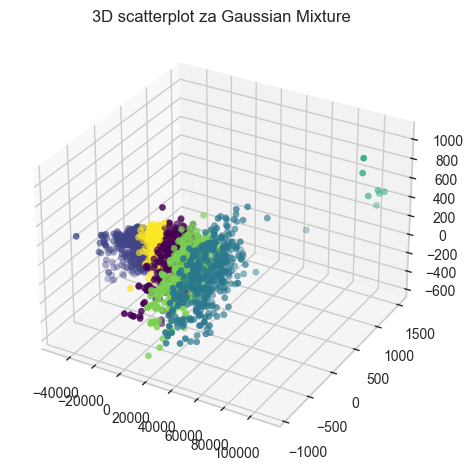

C:\Users\User\AppData\Local\Temp\ipykernel_28956\2256632336.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='cluster', data=df_pca_gaussianmixture, palette=pal)


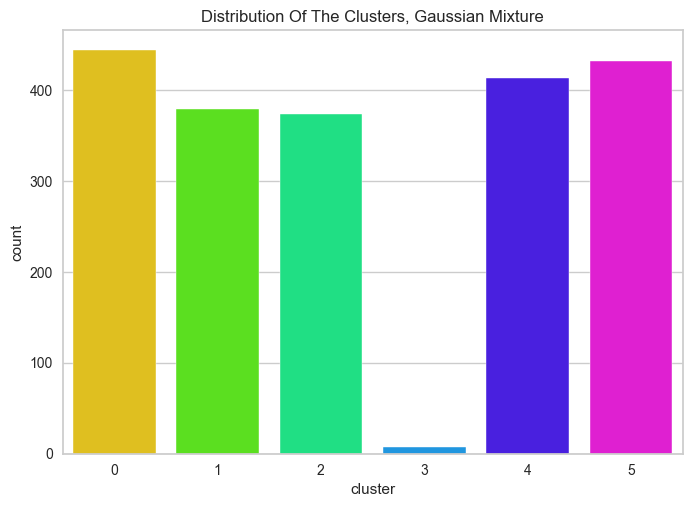

In [72]:
from sklearn.mixture import GaussianMixture

best_gmm = None
best_gmm_labels = None
n_components_range = range(3, 7)  

X_gaus = df_pca_gaussianmixture.values

for k in n_components_range:
    gm_model = GaussianMixture(n_components=k, covariance_type='spherical')
    gm_model.fit(X_gaus)
    gm_labels = gm_model.predict(X_gaus)

    if best_gmm is None or gm_model.bic(X_gaus) < best_gmm.bic(X_gaus):
        best_gmm = gm_model
        best_gmm_labels = gm_labels


df_pca_gaussianmixture['cluster'] = best_gmm_labels

plt.scatter(X_gaus[:, 0], X_gaus[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title("2D scatterplot za Gaussian Mixture")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_gaussianmixture['f1'], df_pca_gaussianmixture['f2'], df_pca_gaussianmixture['f3'], c=best_gmm_labels, cmap='viridis')
ax.set_title("3D scatterplot za Gaussian Mixture")
plt.show()

n_clusters = len(np.unique(best_gmm_labels))
pal = sns.color_palette("hsv", n_clusters)
pl = sns.countplot(x='cluster', data=df_pca_gaussianmixture, palette=pal)
pl.set_title("Distribution Of The Clusters, Gaussian Mixture")
plt.show()


#### Silhouette score

In [73]:
score_silhouette = silhouette_score(X_gaus, best_gmm_labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Gaussian Mixture", 6 , "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5295409042137877


#### Calianski_Harabasz score

In [74]:
score_calianski_harabasz = calinski_harabasz_score(X_gaus, best_gmm_labels)
print("Calianski_Harabasz score", score_calianski_harabasz)

izlaz.loc[-1] = ["Gaussian Mixture", 6, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()

Calianski_Harabasz score 7020.227028226056


#### Davies-Bouldin score

In [75]:
score_davies_bouldin = davies_bouldin_score(X_gaus, best_gmm_labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Gaussian Mixture", 6 , "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.46125914725103184


In [76]:
izlaz

Algoritam  Broj klastera            Score type        Score
0      Gaussian Mixture              6  Davies-Bouldin score     0.461259
1      Gaussian Mixture              6    Calianski_Harabasz  7020.227028
2      Gaussian Mixture              6            Silhouette     0.529541
3   Spectral Clustering              3  Davies-Bouldin score     0.544036
4   Spectral Clustering              3    Calianski_Harabasz  4358.238587
5   Spectral Clustering              3            Silhouette     0.531353
6         Agglomerative              5  Davies-Bouldin score     0.583534
7         Agglomerative              5    Calianski_Harabasz  4765.825284
8         Agglomerative              5            Silhouette     0.501007
9               K-Means              5  Davies-Bouldin score     0.455532
10              K-Means              5    Calianski_Harabasz  5798.018708
11              K-Means              5            Silhouette     0.534974

In [77]:
df_sorted_score = testing.sort_values(by='Score', ascending=False)
df_sorted_score

Algoritam  Broj klastera            Score type        Score
0      Gaussian Mixture              6    Calianski_Harabasz  7020.227028
9               K-Means              5    Calianski_Harabasz  5798.018708
6         Agglomerative              5    Calianski_Harabasz  4765.825284
3   Spectral Clustering              3    Calianski_Harabasz  4358.238587
5         Agglomerative              5  Davies-Bouldin score     0.583534
2   Spectral Clustering              3  Davies-Bouldin score     0.544036
10              K-Means              5            Silhouette     0.534974
4   Spectral Clustering              3            Silhouette     0.531353
1      Gaussian Mixture              6            Silhouette     0.529541
7         Agglomerative              5            Silhouette     0.501007
8               K-Means              5  Davies-Bouldin score     0.455532

## Redukcija atributa

In [78]:
encoded_data.head(n=10)

Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0               1  58138.0       58    635      88   546   172      88    88   
1               1  46344.0       38     11       1     6     2       1     6   
2               0  71613.0       26    426      49   127   111      21    42   
3               0  26646.0       26     11       4    20    10       3     5   
4               0  58293.0       94    173      43   118    46      27    15   
5               0  62513.0       16    520      42    98     0      42    14   
6               1  55635.0       34    235      65   164    50      49    27   
7               0  33454.0       32     76      10    56     3       1    23   
8               0  30351.0       19     14       0    24     3       3     2   
9               0   5648.0       68     28       0     6     1       1    13   

   NumDealsPurchases  ...  Store Purchases  Web visits per Month  Complain  \
0                  3  ...                4                     7         0   
1                  2  ...                2                     5         0   
2                  1  ...               10                     4         0   
3                  2  ...                4                     6         0   
4                  5  ...                6                     5         0   
5                  2  ...               10                     6         0   
6                  4  ...                7                     6         0   
7                  2  ...                4                     8         0   
8                  1  ...                2                     9         0   
9                  1  ...                0                    20         0   

   Education_Advanced  Education_Graduate  Education_Undergraduate  Children  \
0                   0                   1                        0         0   
1                   0                   1                        0         2   
2                   0                   1                        0         0   
3                   0                   1                        0         1   
4                   1                   0                        0         1   
5                   1                   0                        0         1   
6                   0                   1                        0         1   
7                   1                   0                        0         1   
8                   1                   0                        0         1   
9                   1                   0                        0         2   

   Age  Days_Since_First_Purchase  TotalAcceptedCmp  
0   57                         36                 1  
1   60                        586                 0  
2   49                        387                 0  
3   30                        560                 0  
4   33                        538                 0  
5   47                        406                 0  
6   43                        106                 0  
7   29                        282                 0  
8   40                        311                 1  
9   64                        591                 1  

[10 rows x 22 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

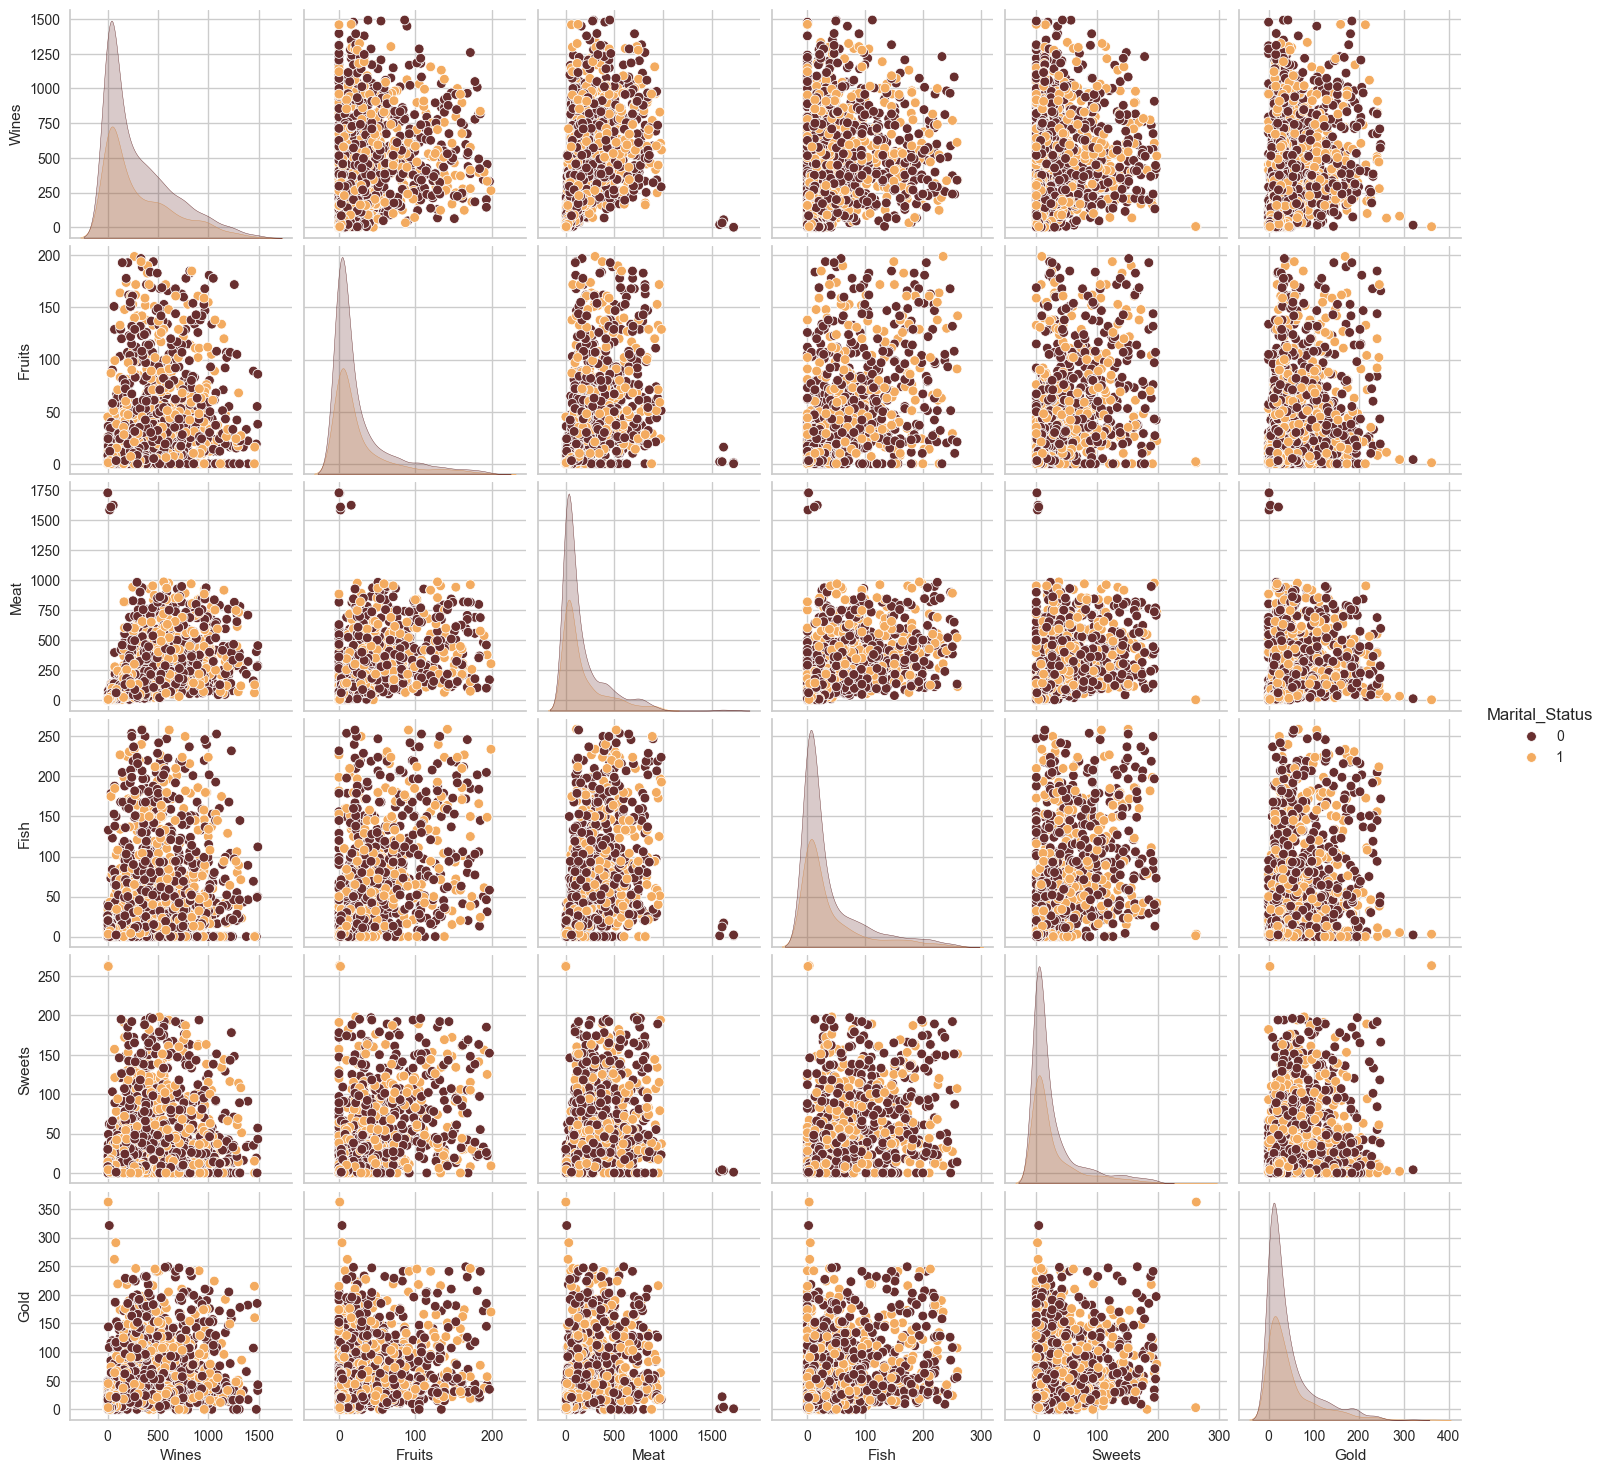

In [79]:
To_Plot = [ "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold","Marital_Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(encoded_data[To_Plot], hue= "Marital_Status",palette= (["#682F2F","#F3AB60"]))
plt.show()

In [80]:
encoded_data = encoded_data[(encoded_data["Meat"]<1200)]
print("Ukupan broj instanci nakon izbrisanih outliera je:", len(encoded_data))

Ukupan broj instanci nakon izbrisanih outliera je: 2046


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

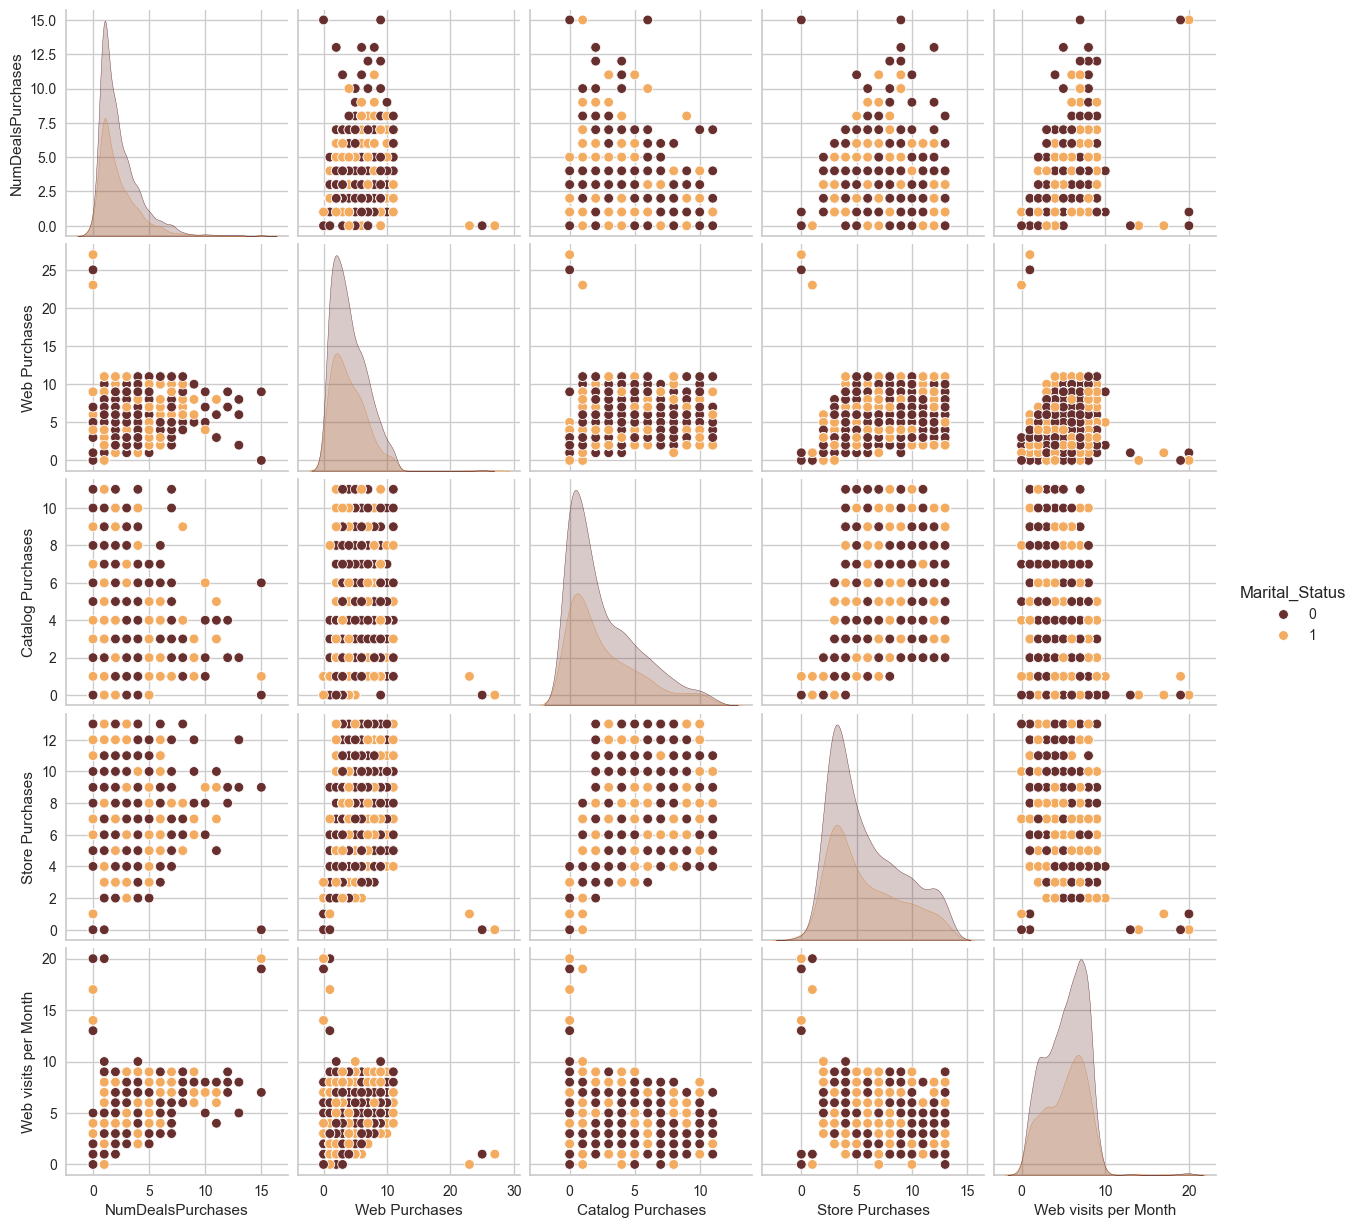

In [81]:
To_Plot = [ "NumDealsPurchases", "Web Purchases", "Catalog Purchases", "Store Purchases", "Web visits per Month", "Marital_Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(encoded_data[To_Plot], hue= "Marital_Status",palette= (["#682F2F","#F3AB60"]))
plt.show()

In [82]:
encoded_data = encoded_data[(encoded_data["Web visits per Month"]<12)]
encoded_data = encoded_data[(encoded_data["Web Purchases"]<20)]
print("Ukupan broj instanci nakon izbrisanih outliera je:", len(encoded_data))

Ukupan broj instanci nakon izbrisanih outliera je: 2033


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

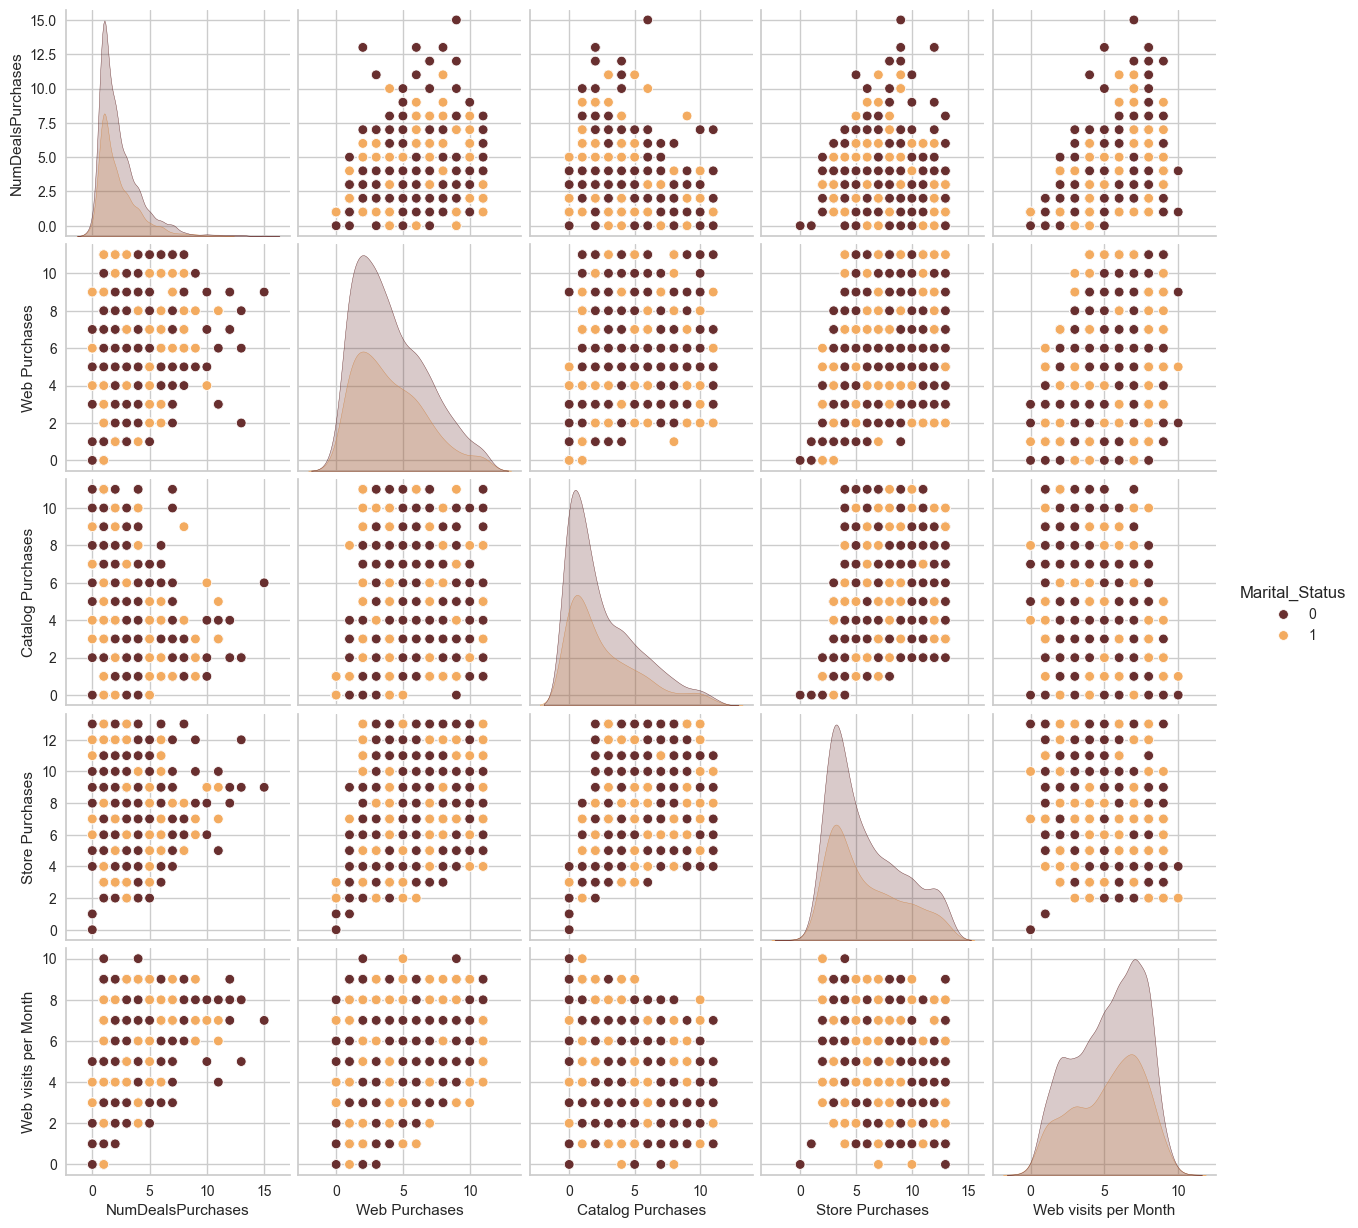

In [83]:
To_Plot = [ "NumDealsPurchases", "Web Purchases", "Catalog Purchases", "Store Purchases", "Web visits per Month", "Marital_Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(encoded_data[To_Plot], hue= "Marital_Status",palette= (["#682F2F","#F3AB60"]))
plt.show()

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

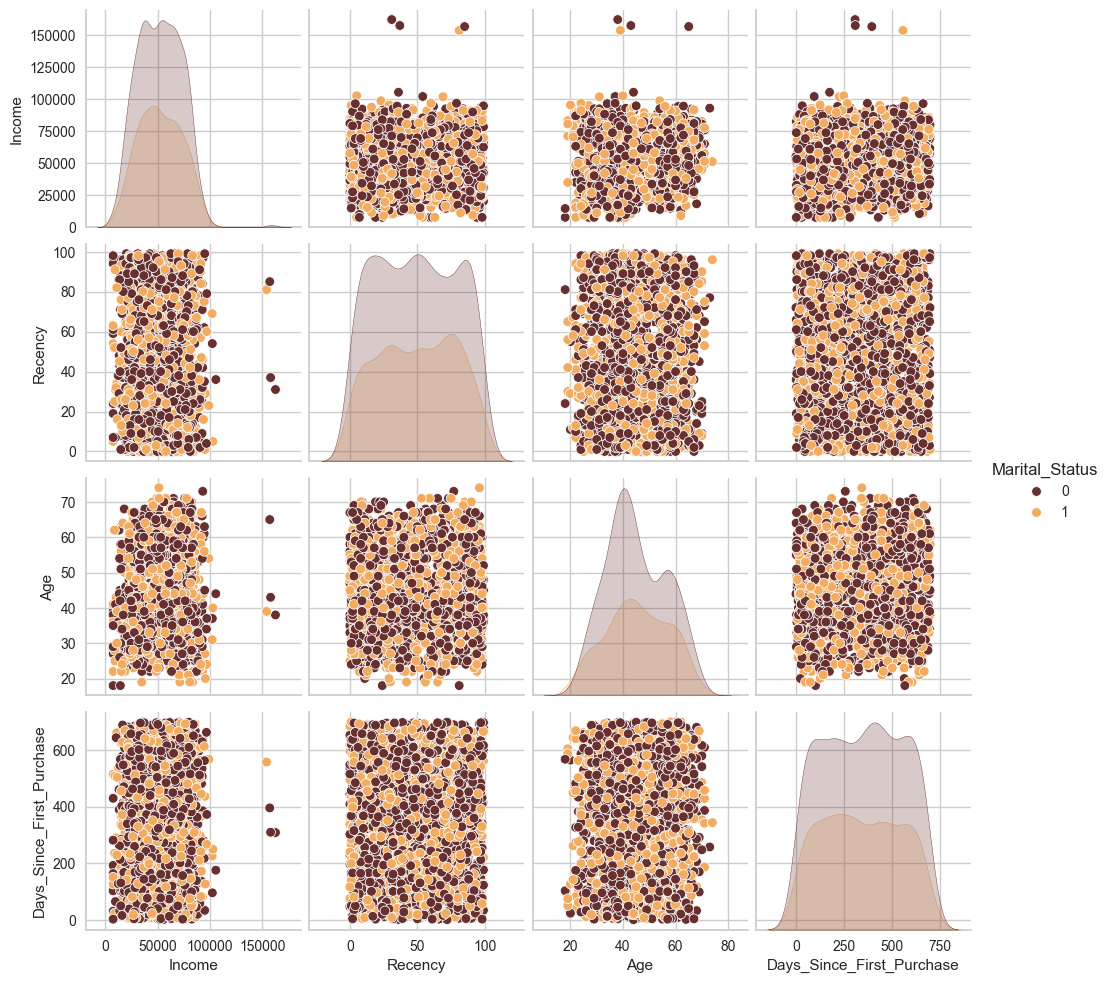

In [84]:
To_Plot = [ "Income", "Recency", "Age", "Days_Since_First_Purchase", "Marital_Status"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(encoded_data[To_Plot], hue= "Marital_Status",palette= (["#682F2F","#F3AB60"]))
plt.show()

In [85]:
encoded_data = encoded_data[(encoded_data["Income"]<125000)]
print("Ukupan broj instanci nakon izbrisanih outliera je:", len(encoded_data))

Ukupan broj instanci nakon izbrisanih outliera je: 2029


### Primena algoritama nad redukovanim podacima

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=80)
pca.fit(encoded_data)
df_pca = pd.DataFrame(pca.transform(encoded_data), columns=(["f1","f2", "f3"]))
df_pca.describe().T

count          mean           std           min           25%  \
f1  2029.0 -1.520456e-12  20308.796992 -44437.502128 -16143.072504   
f2  2029.0  2.751121e-14    250.467686   -670.397496   -179.830344   
f3  2029.0 -1.030970e-14    182.085458   -623.645162   -130.726186   

           50%           75%           max  
f1 -550.201343  16200.736697  53536.869162  
f2  -15.862292    144.997728    914.906523  
f3   -2.834838    133.888732    631.820663

In [87]:
x =df_pca["f1"]
y =df_pca["f2"]
z =df_pca["f3"]

df_pca_agg = df_pca.copy()
df_pca_gaussianmixture = df_pca.copy()
df_spec_clus=df_pca.copy()

### K-means reduced

Elbow Method to determine the number of clusters to be formed:


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

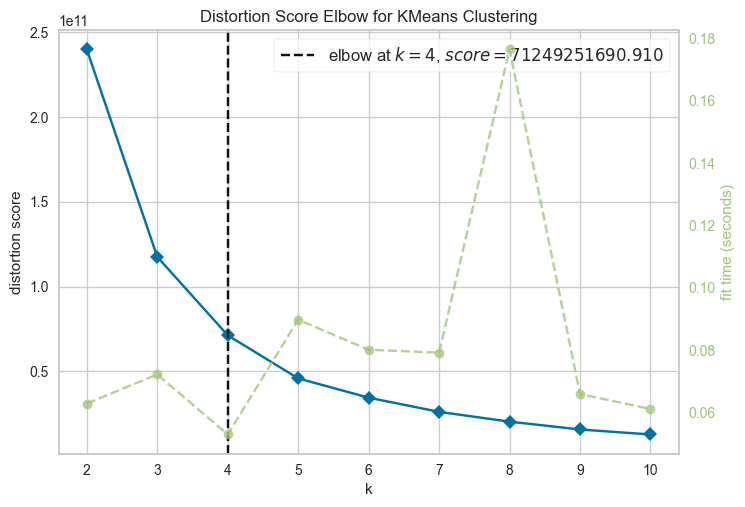

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

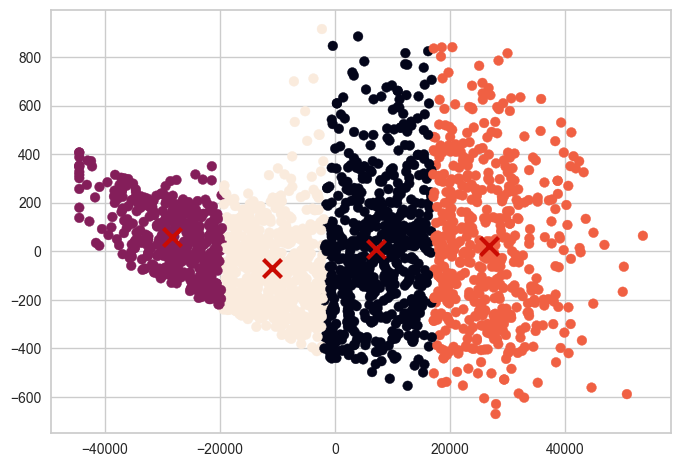

In [114]:
X = df_pca.values

# Inicijalizacija modela
kmeans = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(X)

y_kmeans = kmeans.predict(X)

# Izračunavanje središta klastera
centroids = kmeans.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.show()

df_pca["cluster"] = y_kmeans

In [119]:
df_pca["cluster"] = y_kmeans
df_cluster1 = encoded_data.copy()
df_cluster1["Cluster"] = y_kmeans

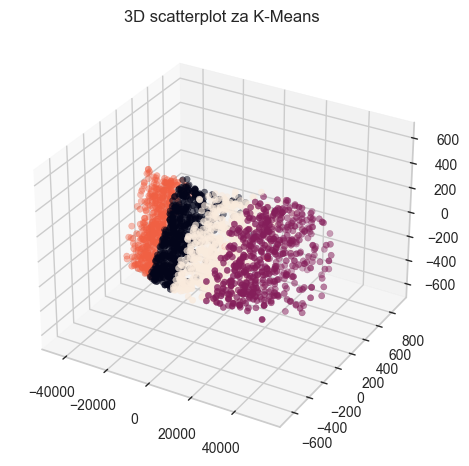

C:\Users\User\AppData\Local\Temp\ipykernel_28956\233195573.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_pca["cluster"], palette= pal)
C:\Users\User\AppData\Local\Temp\ipykernel_28956\233195573.py:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.countplot(x=df_pca["cluster"], palette= pal)


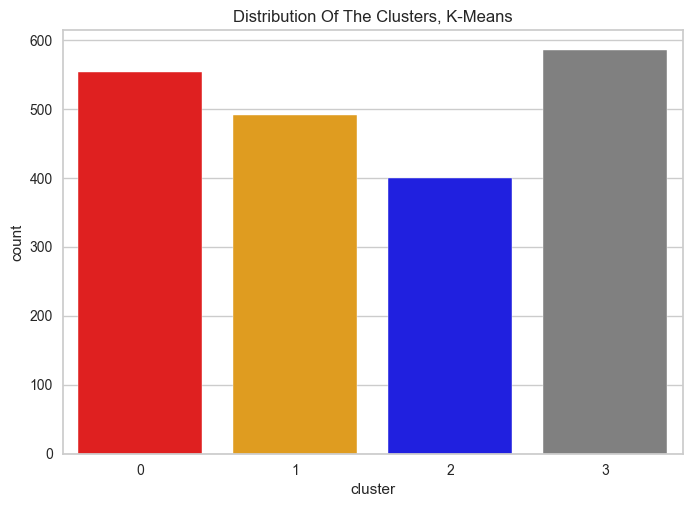

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=df_pca['cluster'])

# Centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='o')

ax.set_title("3D scatterplot za K-Means")

plt.show()

pal = ["#FF0000", "#FFA500", "#0000FF", "#808080", "#FFFF00"]
pl = sns.countplot(x=df_pca["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters, K-Means")
plt.show()

In [91]:
score_silhouette = silhouette_score(X, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["K-Means reduced", Elbow_M.elbow_value_, "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5363186136643391


In [92]:
score_calianski_harabasz = calinski_harabasz_score(X, labels)
print("Calianski Harabasz score:", score_calianski_harabasz)

izlaz.loc[-1] = ["K-Means reduced", Elbow_M.elbow_value_, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()


Calianski Harabasz score: 7251.812894460253


In [93]:
score_davies_bouldin = davies_bouldin_score(X, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["K-Means reduced", Elbow_M.elbow_value_, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()


Davies-Bouldin score: 0.5404715427247326


In [94]:
izlaz

Algoritam  Broj klastera            Score type        Score
0       K-Means reduced              4  Davies-Bouldin score     0.540472
1       K-Means reduced              4    Calianski_Harabasz  7251.812894
2       K-Means reduced              4            Silhouette     0.536319
3      Gaussian Mixture              6  Davies-Bouldin score     0.461259
4      Gaussian Mixture              6    Calianski_Harabasz  7020.227028
5      Gaussian Mixture              6            Silhouette     0.529541
6   Spectral Clustering              3  Davies-Bouldin score     0.544036
7   Spectral Clustering              3    Calianski_Harabasz  4358.238587
8   Spectral Clustering              3            Silhouette     0.531353
9         Agglomerative              5  Davies-Bouldin score     0.583534
10        Agglomerative              5    Calianski_Harabasz  4765.825284
11        Agglomerative              5            Silhouette     0.501007
12              K-Means              5  Davies-Bouldin score     0.455532
13              K-Means              5    Calianski_Harabasz  5798.018708
14              K-Means              5            Silhouette     0.534974

### Agglomerative reduced

Elbow Method to determine the number of clusters to be formed:


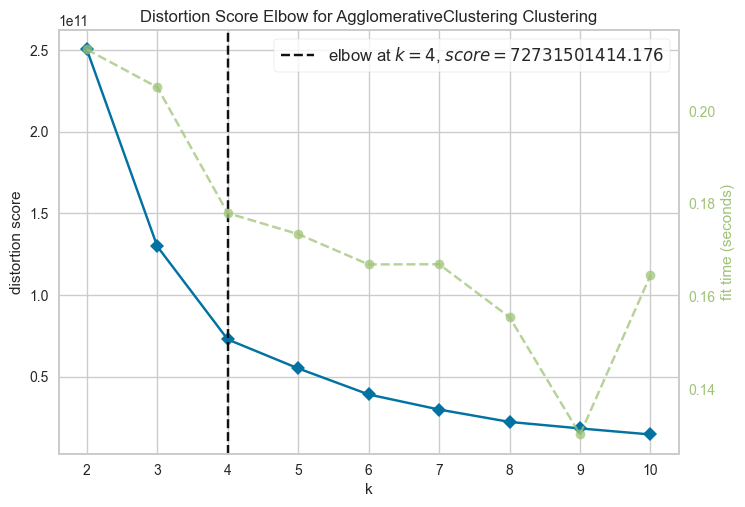

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(df_pca_agg)
Elbow_M.show()


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


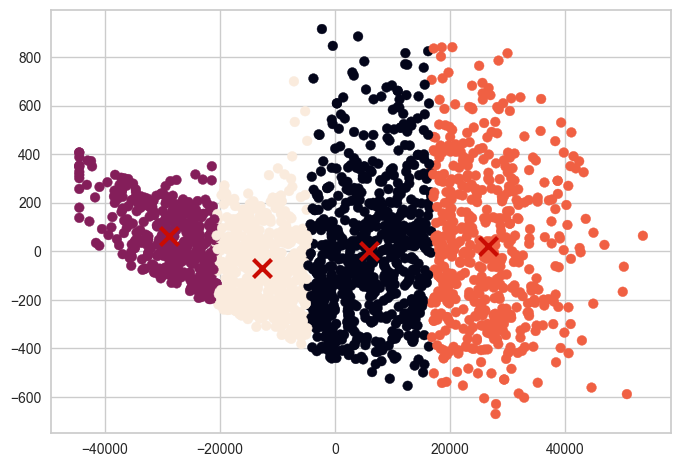

In [96]:
X_agg = df_pca_agg.values
AC = AgglomerativeClustering(n_clusters=Elbow_M.elbow_value_, affinity='euclidean', linkage='ward')
yhat_AC = AC.fit_predict(X_agg)
df_pca_agg["cluster"]= yhat_AC
labels = AC.labels_
centroids = np.zeros((AC.n_clusters, df_pca_agg.shape[1]))
for i in range(AC.n_clusters):
    centroids[i, :] = np.mean(df_pca_agg[df_pca_agg["cluster"] == i], axis = 0)

plt.scatter(X_agg[:, 0], X_agg[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.show()

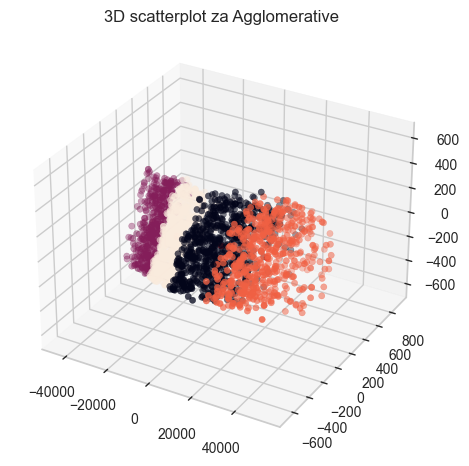

C:\Users\User\AppData\Local\Temp\ipykernel_28956\2624976018.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_pca_agg["cluster"], palette= pal)
C:\Users\User\AppData\Local\Temp\ipykernel_28956\2624976018.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.countplot(x=df_pca_agg["cluster"], palette= pal)


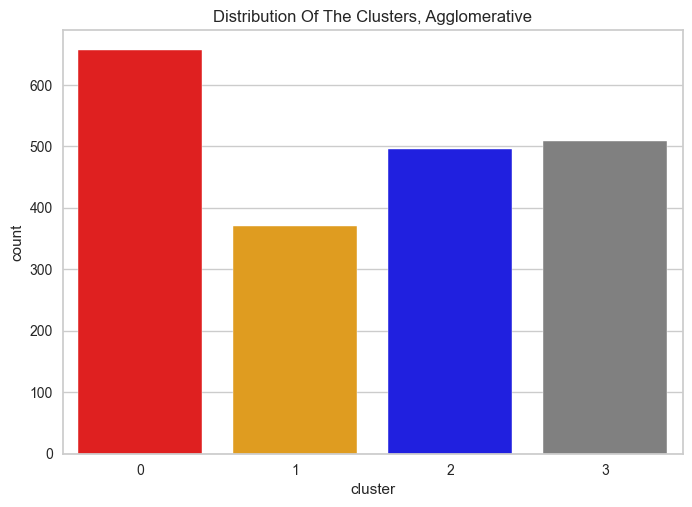

In [97]:
x =df_pca_agg["f1"]
y =df_pca_agg["f2"]
z =df_pca_agg["f3"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=df_pca_agg['cluster'])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='o')

ax.set_title("3D scatterplot za Agglomerative")

plt.show()

pal = ["#FF0000", "#FFA500", "#0000FF", "#808080", "#FFFF00"]
pl = sns.countplot(x=df_pca_agg["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters, Agglomerative")
plt.show()

In [98]:
score_silhouette = silhouette_score(X_agg, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Agglomerative reduced", Elbow_M.elbow_value_, "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5355927278311177


In [99]:
score_calianski_harabasz = calinski_harabasz_score(X_agg, labels)
print("Calianski Harabasz score:", score_calianski_harabasz)

izlaz.loc[-1] = ["Agglomerative reduced", Elbow_M.elbow_value_, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()


Calianski Harabasz score: 7089.589923784775


In [100]:
score_davies_bouldin = davies_bouldin_score(X_agg, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Agglomerative reduced", Elbow_M.elbow_value_, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.5370914959904134


In [101]:
izlaz

Algoritam  Broj klastera            Score type        Score
0   Agglomerative reduced              4  Davies-Bouldin score     0.537091
1   Agglomerative reduced              4    Calianski_Harabasz  7089.589924
2   Agglomerative reduced              4            Silhouette     0.535593
3         K-Means reduced              4  Davies-Bouldin score     0.540472
4         K-Means reduced              4    Calianski_Harabasz  7251.812894
5         K-Means reduced              4            Silhouette     0.536319
6        Gaussian Mixture              6  Davies-Bouldin score     0.461259
7        Gaussian Mixture              6    Calianski_Harabasz  7020.227028
8        Gaussian Mixture              6            Silhouette     0.529541
9     Spectral Clustering              3  Davies-Bouldin score     0.544036
10    Spectral Clustering              3    Calianski_Harabasz  4358.238587
11    Spectral Clustering              3            Silhouette     0.531353
12          Agglomerative              5  Davies-Bouldin score     0.583534
13          Agglomerative              5    Calianski_Harabasz  4765.825284
14          Agglomerative              5            Silhouette     0.501007
15                K-Means              5  Davies-Bouldin score     0.455532
16                K-Means              5    Calianski_Harabasz  5798.018708
17                K-Means              5            Silhouette     0.534974

### Spectral Clustering

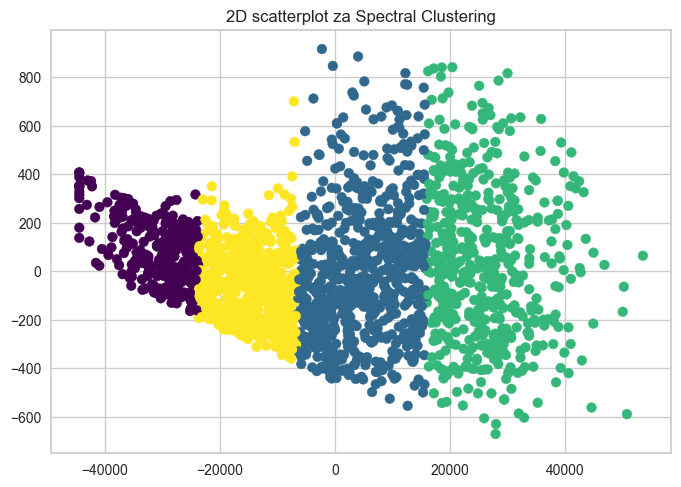

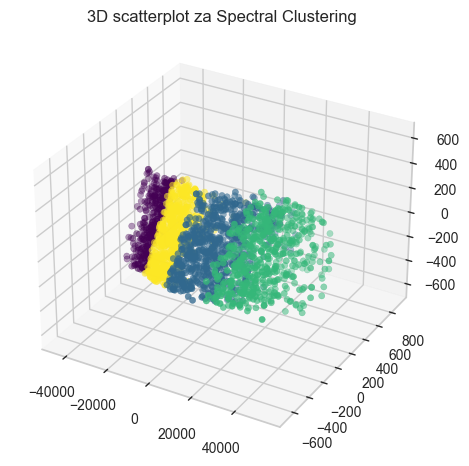

C:\Users\User\AppData\Local\Temp\ipykernel_28956\1197365030.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='cluster', data=df_spec_clus, palette=pal)


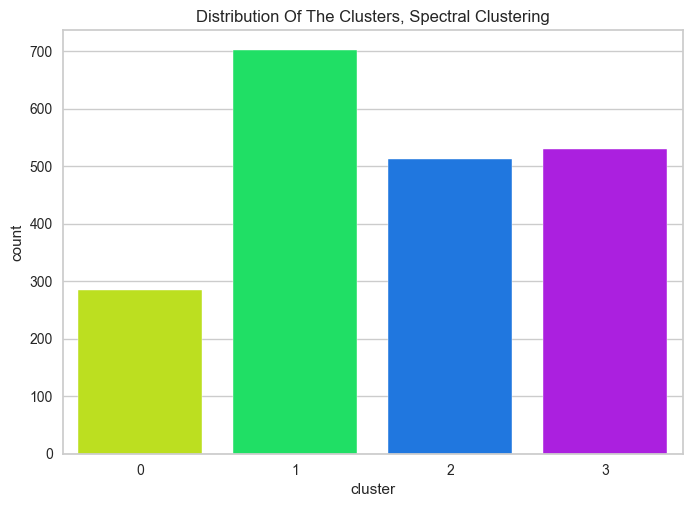

In [102]:
X_spectral = df_spec_clus.values

n_clusters = 4

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(X_spectral)

df_spec_clus['cluster'] = labels

plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c=labels, cmap='viridis')
plt.title("2D scatterplot za Spectral Clustering")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_spec_clus['f1'], df_spec_clus['f2'], df_spec_clus['f3'], c=labels, cmap='viridis')
ax.set_title("3D scatterplot za Spectral Clustering")
plt.show()

pal = sns.color_palette("hsv", n_clusters)  
pl = sns.countplot(x='cluster', data=df_spec_clus, palette=pal)
pl.set_title("Distribution Of The Clusters, Spectral Clustering")
plt.show()

In [103]:
score_silhouette = silhouette_score(X_spectral, labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Spectral Clustering reduced", 4 , "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5335758727782799


In [104]:
score_calianski_harabasz = calinski_harabasz_score(X_spectral, labels)
print("Calianski_Harabasz score", score_calianski_harabasz)

izlaz.loc[-1] = ["Spectral Clustering reduced", 3, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()

Calianski_Harabasz score 6732.36200643975


In [105]:
score_davies_bouldin = davies_bouldin_score(X_spectral, labels)

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Spectral Clustering reduced", 3, "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.5305481084295063


In [106]:
izlaz

Algoritam  Broj klastera            Score type  \
0   Spectral Clustering reduced              3  Davies-Bouldin score   
1   Spectral Clustering reduced              3    Calianski_Harabasz   
2   Spectral Clustering reduced              4            Silhouette   
3         Agglomerative reduced              4  Davies-Bouldin score   
4         Agglomerative reduced              4    Calianski_Harabasz   
5         Agglomerative reduced              4            Silhouette   
6               K-Means reduced              4  Davies-Bouldin score   
7               K-Means reduced              4    Calianski_Harabasz   
8               K-Means reduced              4            Silhouette   
9              Gaussian Mixture              6  Davies-Bouldin score   
10             Gaussian Mixture              6    Calianski_Harabasz   
11             Gaussian Mixture              6            Silhouette   
12          Spectral Clustering              3  Davies-Bouldin score   
13          Spectral Clustering              3    Calianski_Harabasz   
14          Spectral Clustering              3            Silhouette   
15                Agglomerative              5  Davies-Bouldin score   
16                Agglomerative              5    Calianski_Harabasz   
17                Agglomerative              5            Silhouette   
18                      K-Means              5  Davies-Bouldin score   
19                      K-Means              5    Calianski_Harabasz   
20                      K-Means              5            Silhouette   

          Score  
0      0.530548  
1   6732.362006  
2      0.533576  
3      0.537091  
4   7089.589924  
5      0.535593  
6      0.540472  
7   7251.812894  
8      0.536319  
9      0.461259  
10  7020.227028  
11     0.529541  
12     0.544036  
13  4358.238587  
14     0.531353  
15     0.583534  
16  4765.825284  
17     0.501007  
18     0.455532  
19  5798.018708  
20     0.534974

### Gaussian Mixture

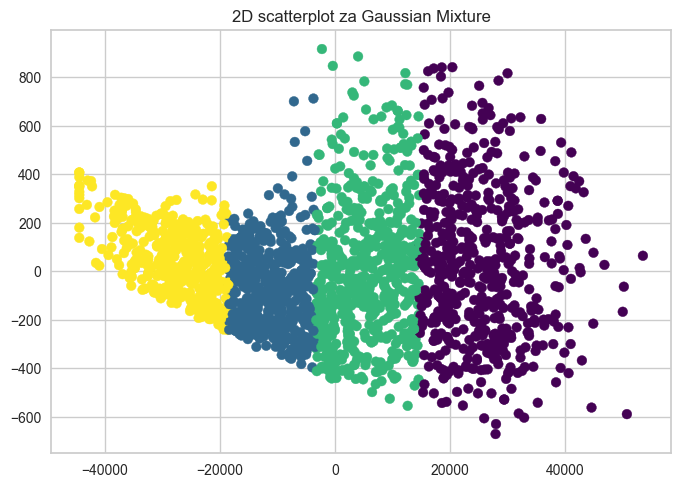

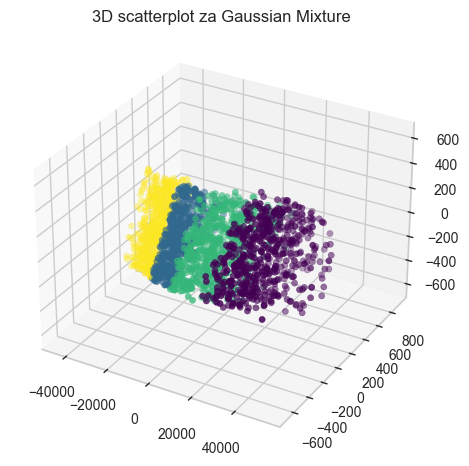

C:\Users\User\AppData\Local\Temp\ipykernel_28956\2201302698.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='cluster', data=df_pca_gaussianmixture, palette=pal)


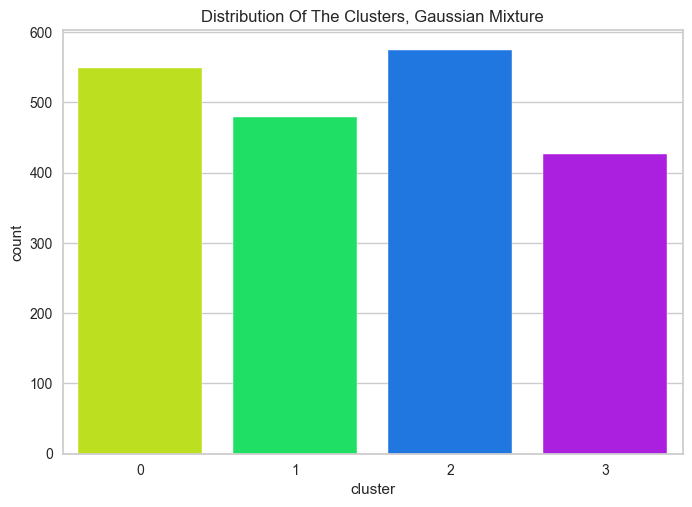

In [107]:
X_gaus = df_pca_gaussianmixture.values

n_clusters = 4  

gm_model = GaussianMixture(n_components=n_clusters, covariance_type='spherical')
gm_labels = gm_model.fit_predict(X_gaus)

df_pca_gaussianmixture['cluster'] = gm_labels

plt.scatter(X_gaus[:, 0], X_gaus[:, 1], c=gm_labels, cmap='viridis')
plt.title("2D scatterplot za Gaussian Mixture")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_gaussianmixture['f1'], df_pca_gaussianmixture['f2'], df_pca_gaussianmixture['f3'], c=gm_labels, cmap='viridis')
ax.set_title("3D scatterplot za Gaussian Mixture")
plt.show()

n_clusters = len(np.unique(gm_labels))
pal = sns.color_palette("hsv", n_clusters)
pl = sns.countplot(x='cluster', data=df_pca_gaussianmixture, palette=pal)
pl.set_title("Distribution Of The Clusters, Gaussian Mixture")
plt.show()

In [108]:
score_silhouette = silhouette_score(X_gaus, gm_labels, metric='euclidean')
print("Silhouette score:", score_silhouette)

izlaz.loc[-1] = ["Gaussian Mixture reduced", 4 , "Silhouette", score_silhouette]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Silhouette score: 0.5310727990757896


In [110]:
score_calianski_harabasz = calinski_harabasz_score(X_gaus, gm_labels)
print("Calianski_Harabasz score", score_calianski_harabasz)

izlaz.loc[-1] = ["Gaussian Mixture reduced", 4, "Calianski_Harabasz", score_calianski_harabasz]
izlaz.index = izlaz.index + 1
testing = izlaz.sort_index()

Calianski_Harabasz score 7016.025603121083


In [111]:
score_davies_bouldin = davies_bouldin_score(X_gaus, gm_labels )

print("Davies-Bouldin score:", score_davies_bouldin)

izlaz.loc[-1] = ["Gaussian Mixture reduced", 4 , "Davies-Bouldin score", score_davies_bouldin]
izlaz.index = izlaz.index + 1
izlaz = izlaz.sort_index()

Davies-Bouldin score: 0.5439735905461469


In [112]:
df_sorted_score = testing.sort_values(by='Score', ascending=False)
df_sorted_score

Algoritam  Broj klastera            Score type  \
9               K-Means reduced              4    Calianski_Harabasz   
6         Agglomerative reduced              4    Calianski_Harabasz   
12             Gaussian Mixture              6    Calianski_Harabasz   
0      Gaussian Mixture reduced              4    Calianski_Harabasz   
3   Spectral Clustering reduced              3    Calianski_Harabasz   
21                      K-Means              5    Calianski_Harabasz   
18                Agglomerative              5    Calianski_Harabasz   
15          Spectral Clustering              3    Calianski_Harabasz   
17                Agglomerative              5  Davies-Bouldin score   
14          Spectral Clustering              3  Davies-Bouldin score   
8               K-Means reduced              4  Davies-Bouldin score   
5         Agglomerative reduced              4  Davies-Bouldin score   
10              K-Means reduced              4            Silhouette   
7         Agglomerative reduced              4            Silhouette   
22                      K-Means              5            Silhouette   
4   Spectral Clustering reduced              4            Silhouette   
16          Spectral Clustering              3            Silhouette   
1      Gaussian Mixture reduced              4            Silhouette   
2   Spectral Clustering reduced              3  Davies-Bouldin score   
13             Gaussian Mixture              6            Silhouette   
19                Agglomerative              5            Silhouette   
11             Gaussian Mixture              6  Davies-Bouldin score   
20                      K-Means              5  Davies-Bouldin score   

          Score  
9   7251.812894  
6   7089.589924  
12  7020.227028  
0   7016.025603  
3   6732.362006  
21  5798.018708  
18  4765.825284  
15  4358.238587  
17     0.583534  
14     0.544036  
8      0.540472  
5      0.537091  
10     0.536319  
7      0.535593  
22     0.534974  
4      0.533576  
16     0.531353  
1      0.531073  
2      0.530548  
13     0.529541  
19     0.501007  
11     0.461259  
20     0.455532

### Najbolji score daje K-means algoritam sa reduced podacima

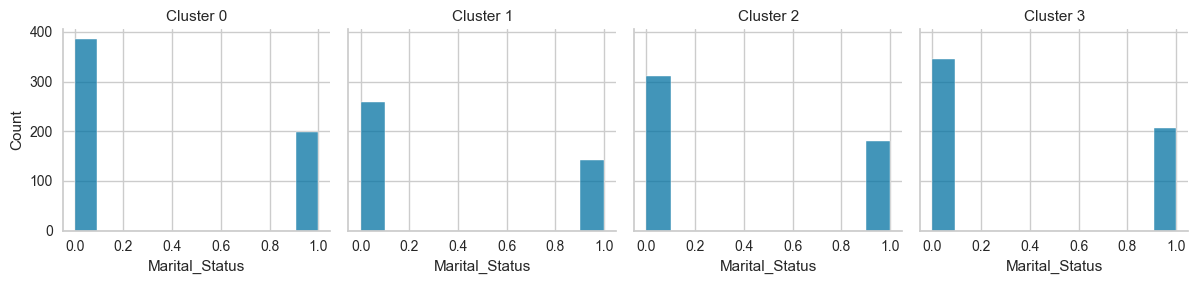

In [120]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Marital_Status", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

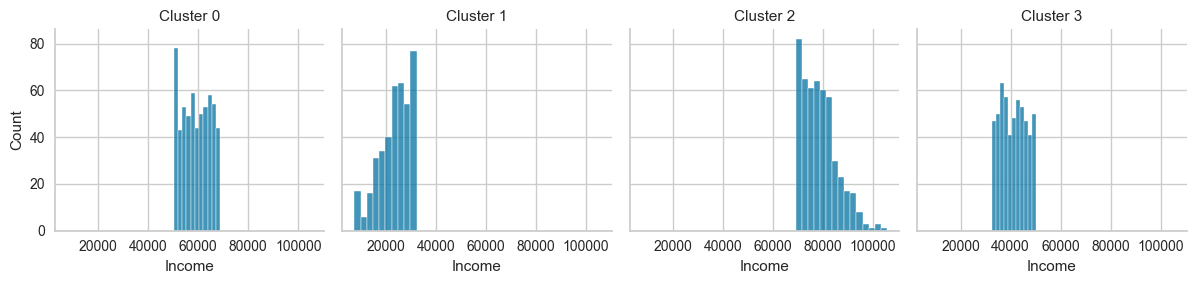

In [121]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Income", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

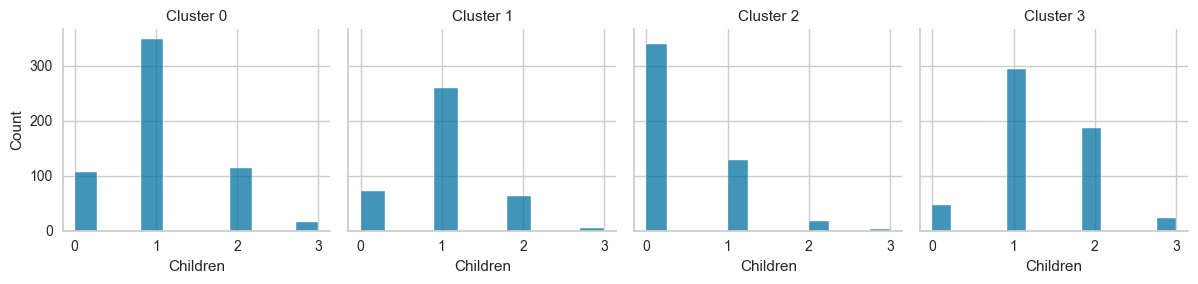

In [122]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Children", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

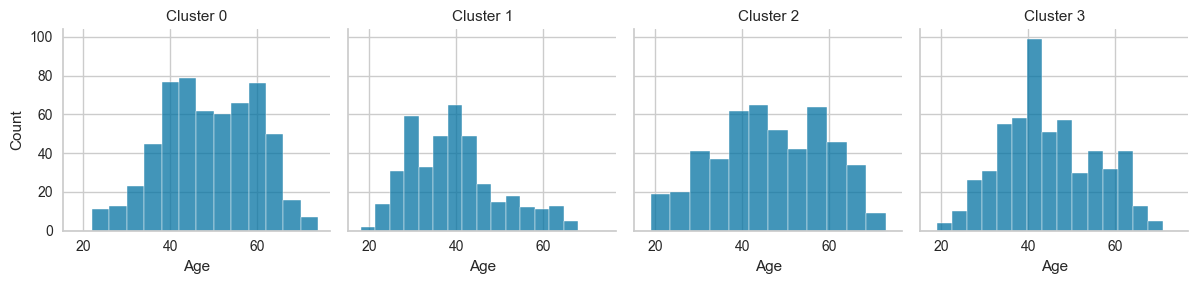

In [131]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Age", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

Mozemo da obrisemo age

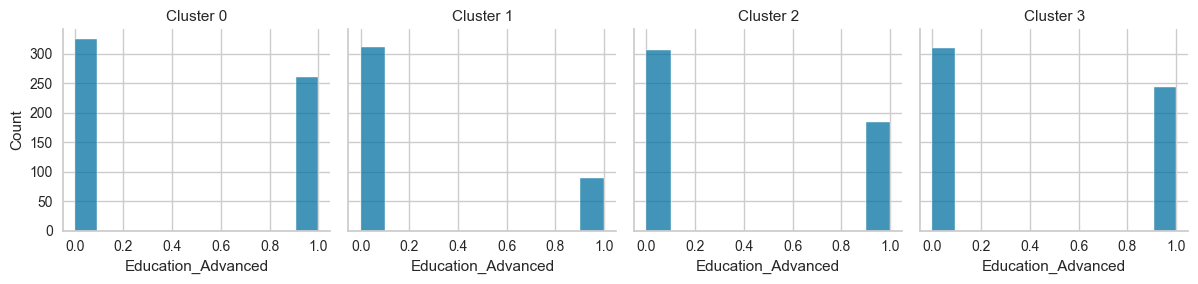

In [123]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Education_Advanced", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

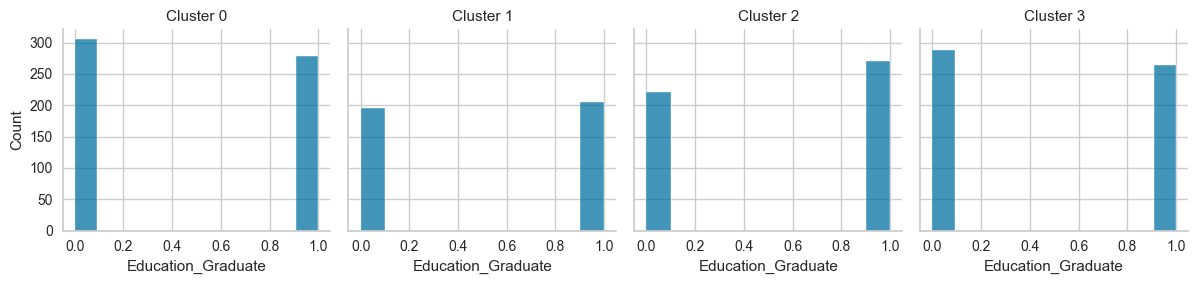

In [124]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Education_Graduate", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

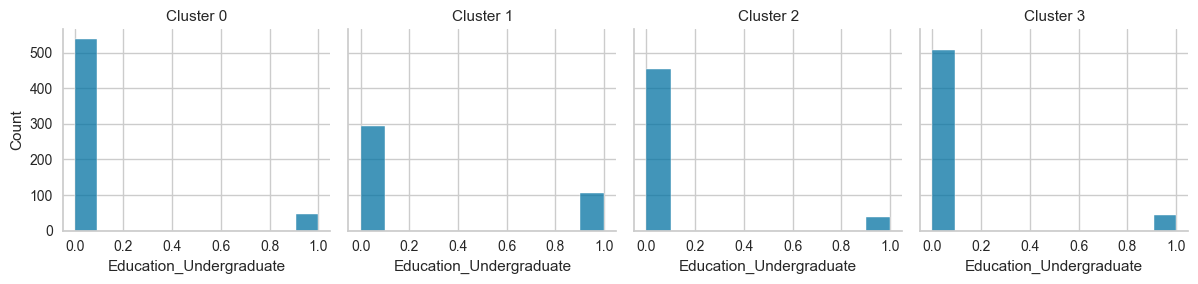

In [125]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Education_Undergraduate", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

Mozemo da ih izbrisemo,jer po distribuciji zakljucujemo da ne uticu na raspodelu po klasterima.

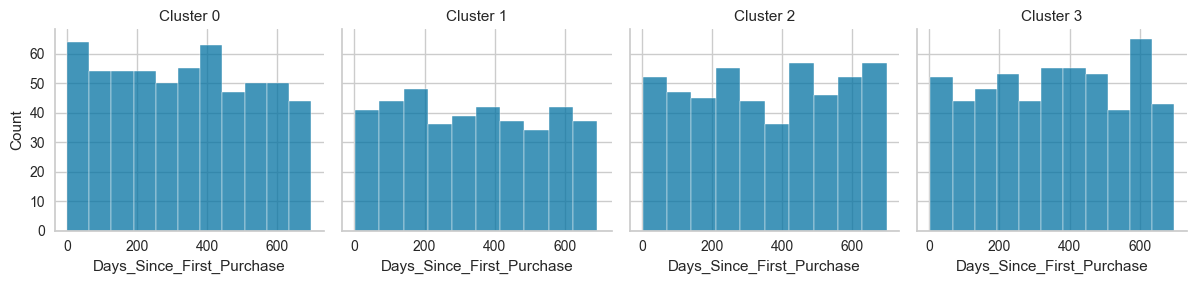

In [127]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Days_Since_First_Purchase", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

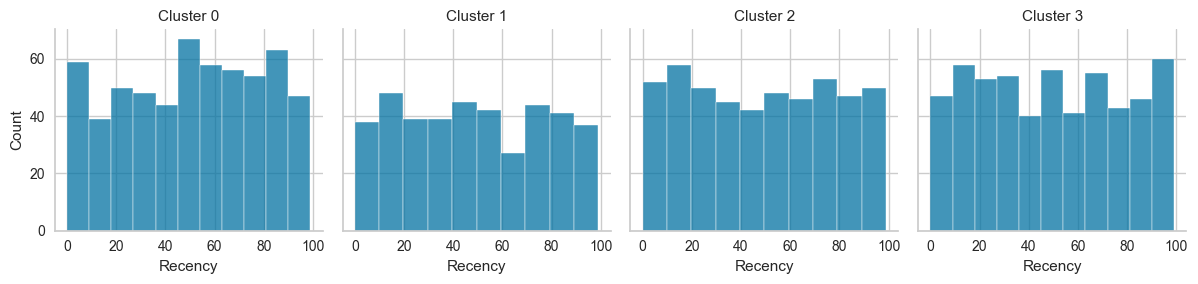

In [128]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Recency", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

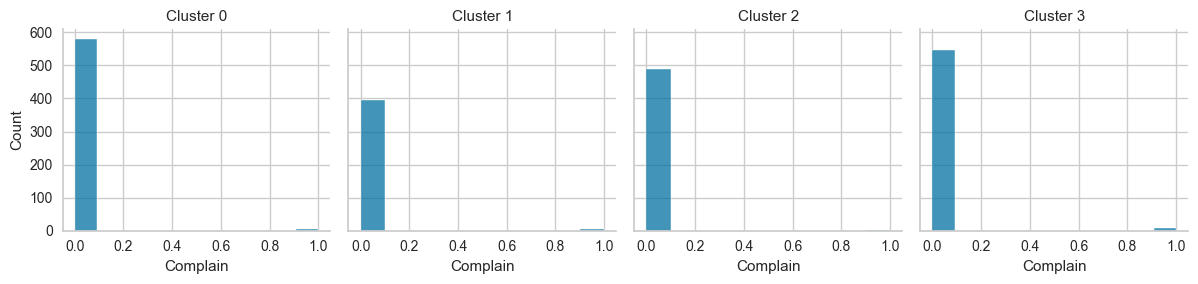

In [129]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "Complain", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

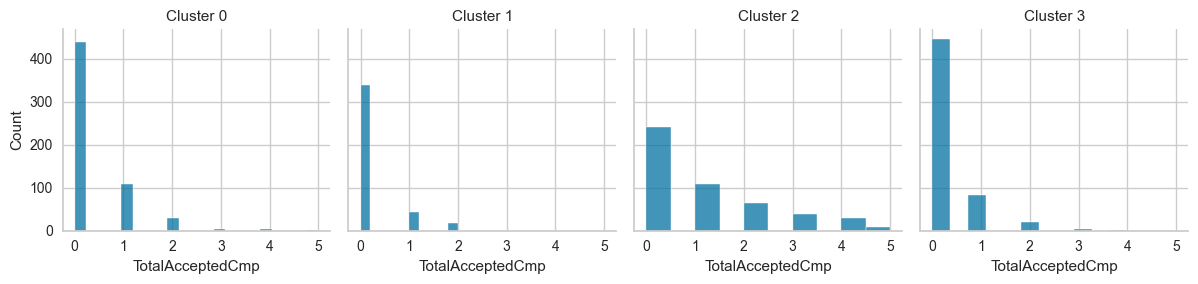

In [130]:
g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
g.map(sns.histplot, "TotalAcceptedCmp", kde=False)
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

Vidimo da ovi atributi ne igraju nikakvu ulogu u klasterizaciji,jer se vrednosti ne razlikuju po klasterima,sto znaci da mozemo da ih obrisemo.

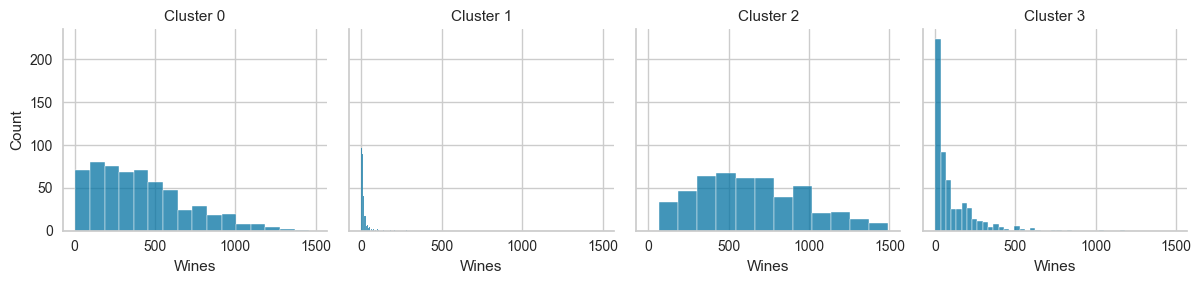

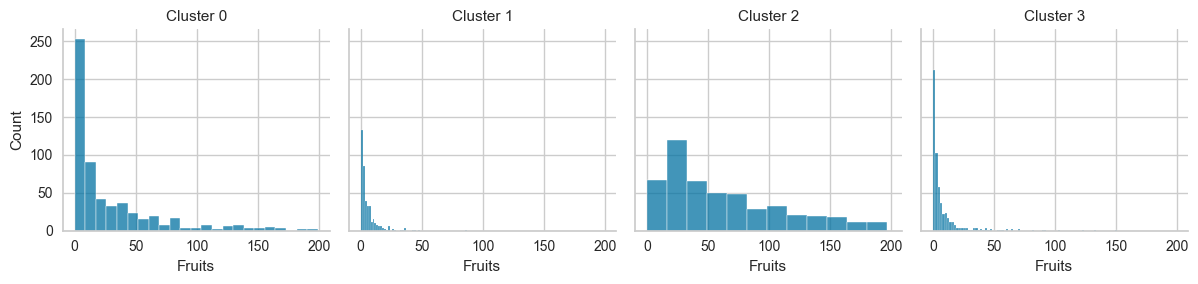

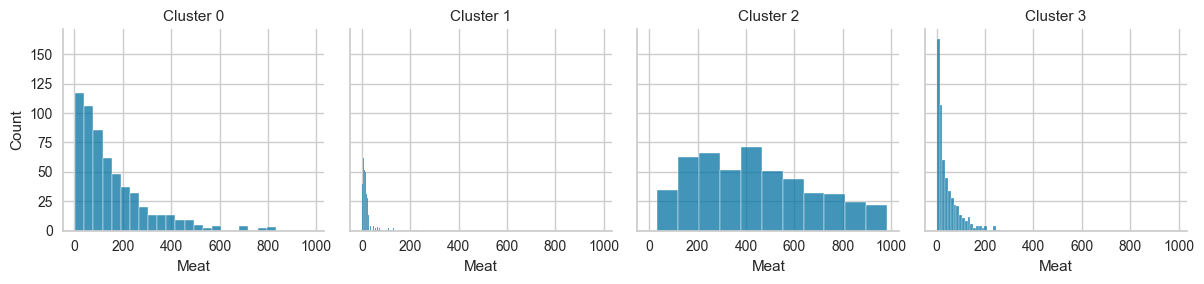

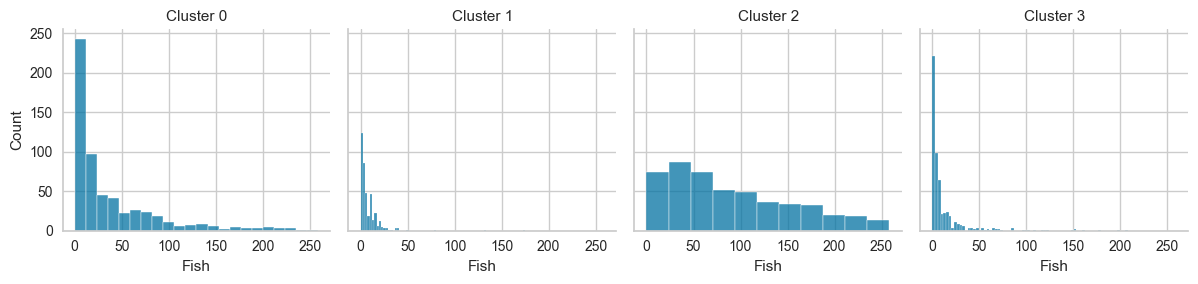

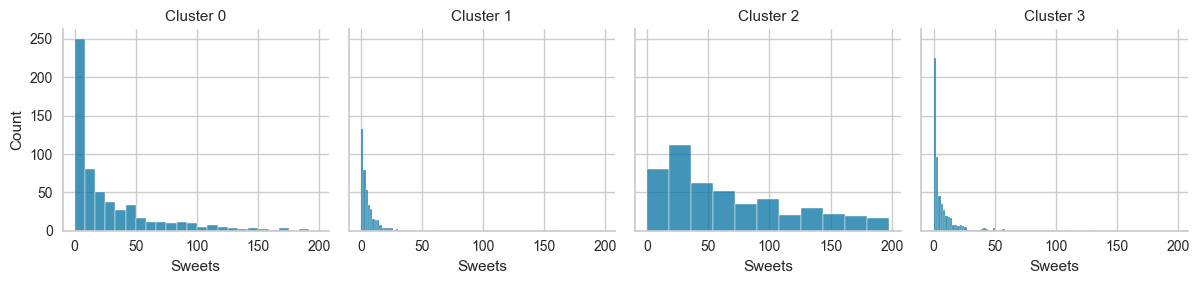

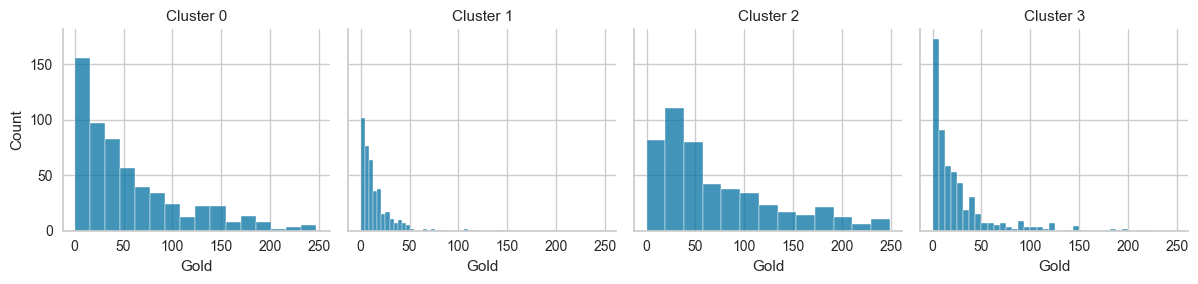

In [132]:
attributes = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]

for attribute in attributes:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
    g.map(sns.histplot, attribute, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()

Zakljucujemo da potrosnja po namirnicima ima istu distribuciju u svim klasterima,sto znaci da mozemo da ih spojimo u ukupnu potrosnju korisnika.

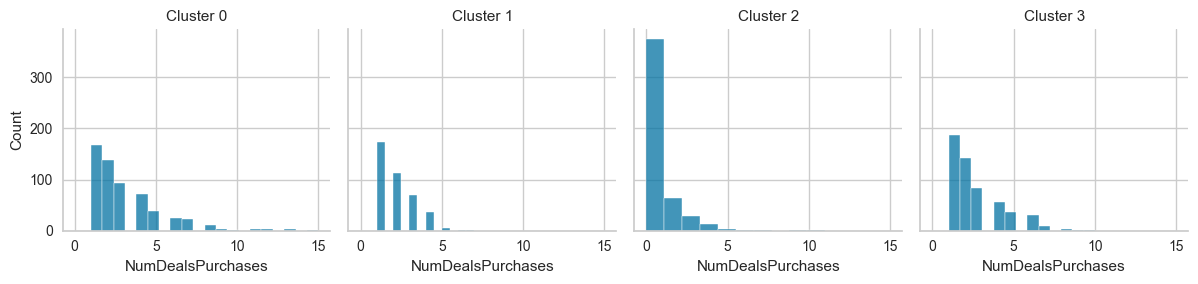

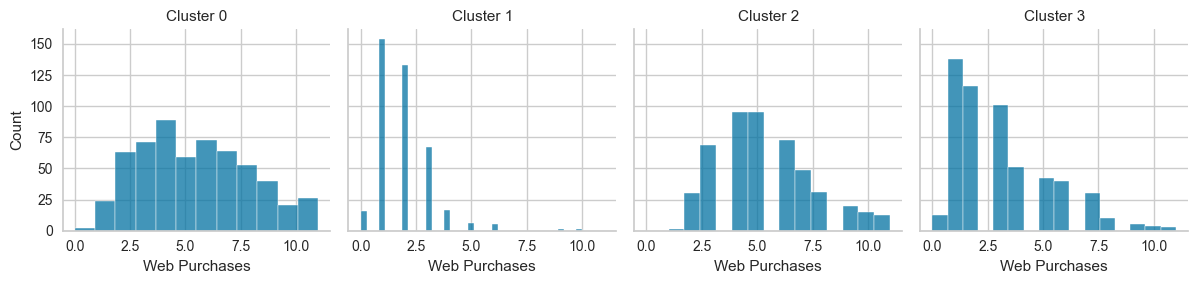

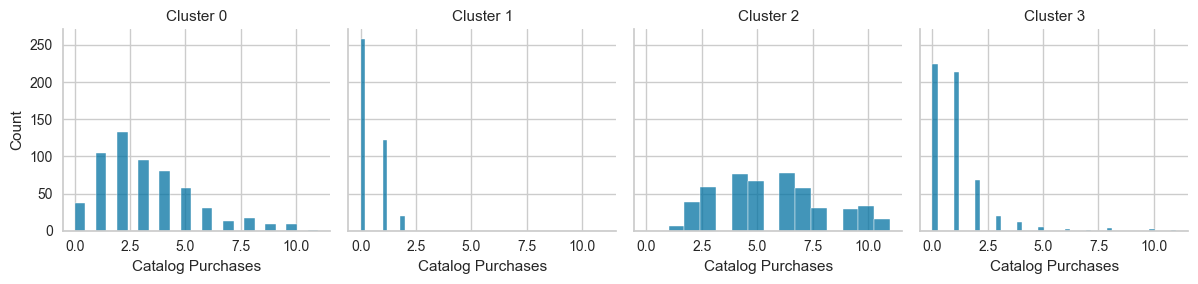

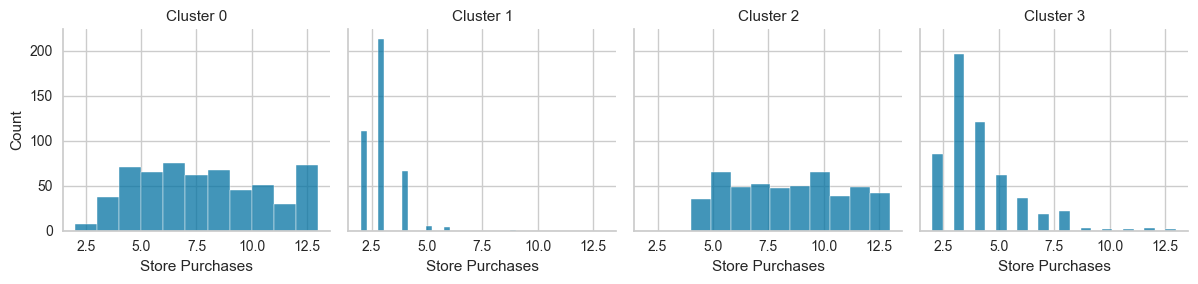

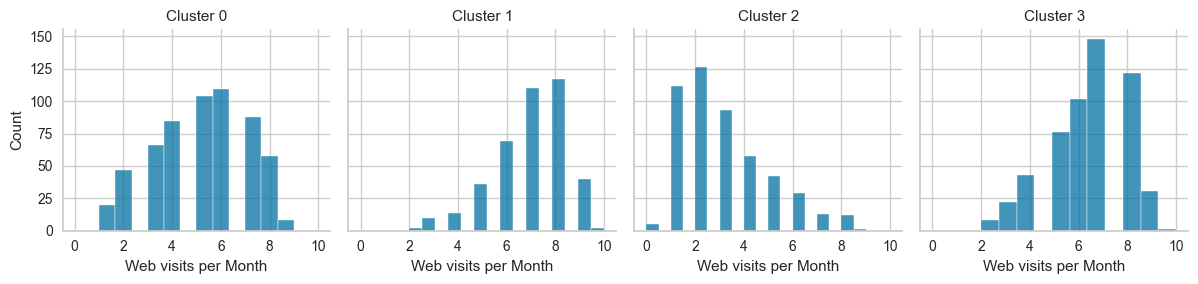

In [133]:
attributes = ["NumDealsPurchases","Web Purchases","Catalog Purchases","Store Purchases","Web visits per Month"]

for attribute in attributes:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
    g.map(sns.histplot, attribute, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()